# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Import the libraries you will be using for analysis
!pip install numpy==1.26.4 pandas==2.2.2 matplotlib==3.10.0 seaborn==0.13.2 --quiet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [5]:
# Try loading one file

df = pd.read_parquet('/content/drive/MyDrive/UpGrad/Datasets and Dictionary/trip_records/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/drive/MyDrive/UpGrad/Datasets and Dictionary/trip_records')

# Create a list of all the twelve files to read
parquet_files = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for parquet_file in parquet_files:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), parquet_file)

        # Reading the current file
        df_monthly = pd.read_parquet(file_path)
        # Ensure pickup datetime is in datetime format
        df_monthly['tpep_pickup_datetime'] = pd.to_datetime(df_monthly['tpep_pickup_datetime'])


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        monthly_sampled_df= pd.DataFrame()
        df_monthly['date'] = df_monthly['tpep_pickup_datetime'].dt.date
        unique_dates = df_monthly['date'].unique()

        # Loop through dates and then loop through every hour of each date
        for date in unique_dates:
            daily_df = df_monthly[df_monthly['date'] == date]


            # Iterate through each hour of the selected date
            for hour in range(24):
                hourly_df = daily_df[daily_df['tpep_pickup_datetime'].dt.hour == hour]


                # add data of this hour to the dataframe

                # Sample 5% of the hourly data randomly
                if not hourly_df.empty:
                    hourly_sample = hourly_df.sample(frac=0.05, random_state=42)
                    monthly_sampled_df = pd.concat([monthly_sampled_df, hourly_sample], ignore_index=True)




        # Concatenate the sampled data of all the dates to a single dataframe
        df =  pd.concat([df, monthly_sampled_df], ignore_index=True) # we initialised this empty DF earlier

    except Exception as error:
        print(f"Error reading file {parquet_file}: {error}")

Error reading file sample_data.csv: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [7]:
# Store the df in csv/parquet
# df.to_parquet('')
df.to_csv("/content/drive/MyDrive/UpGrad/Datasets and Dictionary/trip_records/sample_data.csv", index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [46]:
# Load the new data file
df = pd.read_csv("/content/drive/MyDrive/UpGrad/Datasets and Dictionary/trip_records/sample_data.csv",parse_dates=["tpep_pickup_datetime", "tpep_dropoff_datetime"])
df

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-02-01 00:14:06   2023-02-01 00:19:52              3.0   
1               1  2023-02-01 00:54:09   2023-02-01 01:13:13              1.0   
2               2  2023-02-01 00:14:36   2023-02-01 00:59:16              1.0   
3               1  2023-02-01 00:49:25   2023-02-01 00:53:12              1.0   
4               1  2023-02-01 00:16:02   2023-02-01 00:22:02              1.0   
...           ...                  ...                   ...              ...   
1896395         1  2023-11-30 23:01:23   2023-11-30 23:14:15              NaN   
1896396         2  2023-11-30 23:21:56   2023-11-30 23:36:27              1.0   
1896397         1  2023-11-30 23:59:24   2023-12-01 00:05:48              1.0   
1896398         2  2023-11-30 23:25:14   2023-11-30 23:56:49              1.0   
1896399         2  2023-11-30 23:57:51   2023-12-01 00:03:42              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 1.25         1.0                  N           234   
1                 5.00         1.0                  N            48   
2                24.04         1.0                  N           114   
3                 0.60         1.0                  N           246   
4                 0.90         1.0                  N           114   
...                ...         ...                ...           ...   
1896395           0.00         NaN                NaN           163   
1896396           8.59         1.0                  N           138   
1896397           1.50         1.0                  N           107   
1896398           7.47         1.0                  N           148   
1896399           2.52         1.0                  N            75   

         DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
0                 114             1  ...    1.0      0.5        6.12   
1                  87             1  ...    3.5      0.5        0.00   
2                 121             1  ...    1.0      0.5        6.00   
3                  68             1  ...    3.5      0.5        1.00   
4                 148             1  ...    3.5      0.5        2.55   
...               ...           ...  ...    ...      ...         ...   
1896395           238             0  ...    0.0      0.5        0.00   
1896396           262             1  ...    6.0      0.5       10.15   
1896397           186             1  ...    2.5      0.5        3.80   
1896398           202             1  ...    1.0      0.5        0.00   
1896399           141             1  ...    1.0      0.5        3.28   

         tolls_amount  improvement_surcharge  total_amount  \
0                0.00                    1.0         19.72   
1                0.00                    1.0         28.30   
2                0.00                    1.0        102.20   
3                0.00                    1.0         11.80   
4                0.00                    1.0         15.45   
...               ...                    ...           ...   
1896395          0.00                    1.0         22.73   
1896396          6.94                    1.0         62.64   
1896397          0.00                    1.0         16.40   
1896398          6.94                    1.0         49.24   
1896399          0.00                    1.0         19.68   

         congestion_surcharge  Airport_fee        date airport_fee  
0                         2.5         0.00  2023-02-01         NaN  
1                         2.5         0.00  2023-02-01         NaN  
2                         2.5         0.00  2023-02-01         NaN  
3                         2.5         0.00  2023-02-01         NaN  
4                         2.5         0.00  2023-02-01         NaN  
...                       ...          ...         ...         ...  
1896395                   NaN          NaN  2023-11-30         NaN  
1896396              

In [47]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-02-01 00:14:06   2023-02-01 00:19:52              3.0   
1         1  2023-02-01 00:54:09   2023-02-01 01:13:13              1.0   
2         2  2023-02-01 00:14:36   2023-02-01 00:59:16              1.0   
3         1  2023-02-01 00:49:25   2023-02-01 00:53:12              1.0   
4         1  2023-02-01 00:16:02   2023-02-01 00:22:02              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.25         1.0                  N           234           114   
1           5.00         1.0                  N            48            87   
2          24.04         1.0                  N           114           121   
3           0.60         1.0                  N           246            68   
4           0.90         1.0                  N           114           148   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0             1  ...    1.0      0.5        6.12           0.0   
1             1  ...    3.5      0.5        0.00           0.0   
2             1  ...    1.0      0.5        6.00           0.0   
3             1  ...    3.5      0.5        1.00           0.0   
4             1  ...    3.5      0.5        2.55           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         19.72                   2.5          0.0   
1                    1.0         28.30                   2.5          0.0   
2                    1.0        102.20                   2.5          0.0   
3                    1.0         11.80                   2.5          0.0   
4                    1.0         15.45                   2.5          0.0   

         date airport_fee  
0  2023-02-01         NaN  
1  2023-02-01         NaN  
2  2023-02-01         NaN  
3  2023-02-01         NaN  
4  2023-02-01         NaN  

[5 rows x 21 columns]

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [49]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [50]:
# Combine the two airport fee columns
df.columns = df.columns.str.strip()
print(df.columns.tolist())
if 'Airport_fee' in df.columns and 'airport_fee' in df.columns:
    df['airport_fee'] = df['airport_fee'].fillna(df['Airport_fee'])
    df.drop(columns=['Airport_fee'], inplace=True)
    df.info()


['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee', 'date', 'airport_fee']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount     

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [51]:
# check where values of fare amount are negative
negative_fares = df[df['fare_amount'] < 0]
negative_fares

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, date, airport_fee]
Index: []

Did you notice something different in the `RatecodeID` column for above records?

In [52]:
# Analyse RatecodeID for the negative fare amounts
ratecode_counts = negative_fares['RatecodeID'].value_counts().sort_index()
ratecode_counts


Series([], Name: count, dtype: int64)

In [53]:
# Find which columns have negative values
negative_columns = [(col, (df[col] < 0).sum()) for col in df.select_dtypes(include=['number']).columns if (df[col] < 0).any()]

if negative_columns:
    print("Columns with negative values:")
    for col, count in negative_columns:
        print(f"{col}: {count} negative values")
else:
    print("No negative values found.")



Columns with negative values:
extra: 3 negative values
mta_tax: 73 negative values
improvement_surcharge: 78 negative values
total_amount: 78 negative values
congestion_surcharge: 56 negative values
airport_fee: 15 negative values


In [54]:
# fix these negative values
#Replace Negative Values with Zero
for col in ["extra", "mta_tax", "improvement_surcharge", "total_amount", "congestion_surcharge", "airport_fee"]:
    df[col] = df[col].clip(lower=0)




In [55]:

negative_columns = [(col, (df[col] < 0).sum()) for col in df.select_dtypes(include=['number']).columns if (df[col] < 0).any()]

if negative_columns:
    print("Columns with negative values:")
    for col, count in negative_columns:
        print(f"{col}: {count} negative values")
else:
    print("No negative values found.")



No negative values found.


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [56]:
# Find the proportion of missing values in each column
missing_proportion = df.isnull().mean()
missing_proportion = missing_proportion[missing_proportion > 0]

if not missing_proportion.empty:
    print("Columns with missing values and their proportions:")
    print(missing_proportion)
else:
    print("No missing values found.")



Columns with missing values and their proportions:
passenger_count         0.034209
RatecodeID              0.034209
store_and_fwd_flag      0.034209
congestion_surcharge    0.034209
airport_fee             0.034209
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [57]:
# Display the rows with null values
print(f"Rows with missing values: {df.isnull().any(axis=1).sum()}")
# Impute NaN values in 'passenger_count'
df['passenger_count'].fillna(df['passenger_count'].mode()[0], inplace=True)
print(f"Remaining nulls in 'passenger_count': {df['passenger_count'].isnull().sum()}")
df.head()


Rows with missing values: 64874
Remaining nulls in 'passenger_count': 0


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-02-01 00:14:06   2023-02-01 00:19:52              3.0   
1         1  2023-02-01 00:54:09   2023-02-01 01:13:13              1.0   
2         2  2023-02-01 00:14:36   2023-02-01 00:59:16              1.0   
3         1  2023-02-01 00:49:25   2023-02-01 00:53:12              1.0   
4         1  2023-02-01 00:16:02   2023-02-01 00:22:02              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.25         1.0                  N           234           114   
1           5.00         1.0                  N            48            87   
2          24.04         1.0                  N           114           121   
3           0.60         1.0                  N           246            68   
4           0.90         1.0                  N           114           148   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1          8.6    1.0      0.5        6.12           0.0   
1             1         23.3    3.5      0.5        0.00           0.0   
2             1         91.2    1.0      0.5        6.00           0.0   
3             1          5.8    3.5      0.5        1.00           0.0   
4             1          7.9    3.5      0.5        2.55           0.0   

   improvement_surcharge  total_amount  congestion_surcharge        date  \
0                    1.0         19.72                   2.5  2023-02-01   
1                    1.0         28.30                   2.5  2023-02-01   
2                    1.0        102.20                   2.5  2023-02-01   
3                    1.0         11.80                   2.5  2023-02-01   
4                    1.0         15.45                   2.5  2023-02-01   

   airport_fee  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [58]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'].fillna(df['RatecodeID'].mode()[0], inplace=True)
print("Missing values in 'RatecodeID' fixed.")
df.head()

Missing values in 'RatecodeID' fixed.


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-02-01 00:14:06   2023-02-01 00:19:52              3.0   
1         1  2023-02-01 00:54:09   2023-02-01 01:13:13              1.0   
2         2  2023-02-01 00:14:36   2023-02-01 00:59:16              1.0   
3         1  2023-02-01 00:49:25   2023-02-01 00:53:12              1.0   
4         1  2023-02-01 00:16:02   2023-02-01 00:22:02              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.25         1.0                  N           234           114   
1           5.00         1.0                  N            48            87   
2          24.04         1.0                  N           114           121   
3           0.60         1.0                  N           246            68   
4           0.90         1.0                  N           114           148   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1          8.6    1.0      0.5        6.12           0.0   
1             1         23.3    3.5      0.5        0.00           0.0   
2             1         91.2    1.0      0.5        6.00           0.0   
3             1          5.8    3.5      0.5        1.00           0.0   
4             1          7.9    3.5      0.5        2.55           0.0   

   improvement_surcharge  total_amount  congestion_surcharge        date  \
0                    1.0         19.72                   2.5  2023-02-01   
1                    1.0         28.30                   2.5  2023-02-01   
2                    1.0        102.20                   2.5  2023-02-01   
3                    1.0         11.80                   2.5  2023-02-01   
4                    1.0         15.45                   2.5  2023-02-01   

   airport_fee  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [59]:
# handle null values in congestion_surcharge
df['congestion_surcharge'].fillna(df['congestion_surcharge'].mode()[0], inplace=True)
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-02-01 00:14:06   2023-02-01 00:19:52              3.0   
1         1  2023-02-01 00:54:09   2023-02-01 01:13:13              1.0   
2         2  2023-02-01 00:14:36   2023-02-01 00:59:16              1.0   
3         1  2023-02-01 00:49:25   2023-02-01 00:53:12              1.0   
4         1  2023-02-01 00:16:02   2023-02-01 00:22:02              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.25         1.0                  N           234           114   
1           5.00         1.0                  N            48            87   
2          24.04         1.0                  N           114           121   
3           0.60         1.0                  N           246            68   
4           0.90         1.0                  N           114           148   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1          8.6    1.0      0.5        6.12           0.0   
1             1         23.3    3.5      0.5        0.00           0.0   
2             1         91.2    1.0      0.5        6.00           0.0   
3             1          5.8    3.5      0.5        1.00           0.0   
4             1          7.9    3.5      0.5        2.55           0.0   

   improvement_surcharge  total_amount  congestion_surcharge        date  \
0                    1.0         19.72                   2.5  2023-02-01   
1                    1.0         28.30                   2.5  2023-02-01   
2                    1.0        102.20                   2.5  2023-02-01   
3                    1.0         11.80                   2.5  2023-02-01   
4                    1.0         15.45                   2.5  2023-02-01   

   airport_fee  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [60]:
# Handle any remaining missing values
unique_values = df['store_and_fwd_flag'].unique()
print("Unique values in 'store_and_fwd_flag':", unique_values)
df['store_and_fwd_flag'].fillna(df['store_and_fwd_flag'].mode()[0], inplace=True)
df['airport_fee'].fillna(df['airport_fee'].mode()[0], inplace=True)


Unique values in 'store_and_fwd_flag': ['N' nan 'Y']


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

           VendorID           tpep_pickup_datetime  \
count  1.896400e+06                        1896400   
mean   1.733026e+00  2023-07-02 19:59:52.930796032   
min    1.000000e+00            2022-12-31 23:51:30   
25%    1.000000e+00  2023-04-02 16:10:08.750000128   
50%    2.000000e+00     2023-06-27 15:44:22.500000   
75%    2.000000e+00            2023-10-06 19:37:45   
max    6.000000e+00            2023-12-31 23:57:51   
std    4.476401e-01                            NaN   

               tpep_dropoff_datetime  passenger_count  trip_distance  \
count                        1896400     1.896400e+06   1.896400e+06   
mean   2023-07-02 20:17:18.919563776     1.356585e+00   3.858293e+00   
min              2022-12-31 23:56:06     0.000000e+00   0.000000e+00   
25%       2023-04-02 16:27:43.500000     1.000000e+00   1.050000e+00   
50%              2023-06-27 16:01:15     1.000000e+00   1.790000e+00   
75%              2023-10-06 19:53:39     1.000000e+00   3.400000e+00   
max      

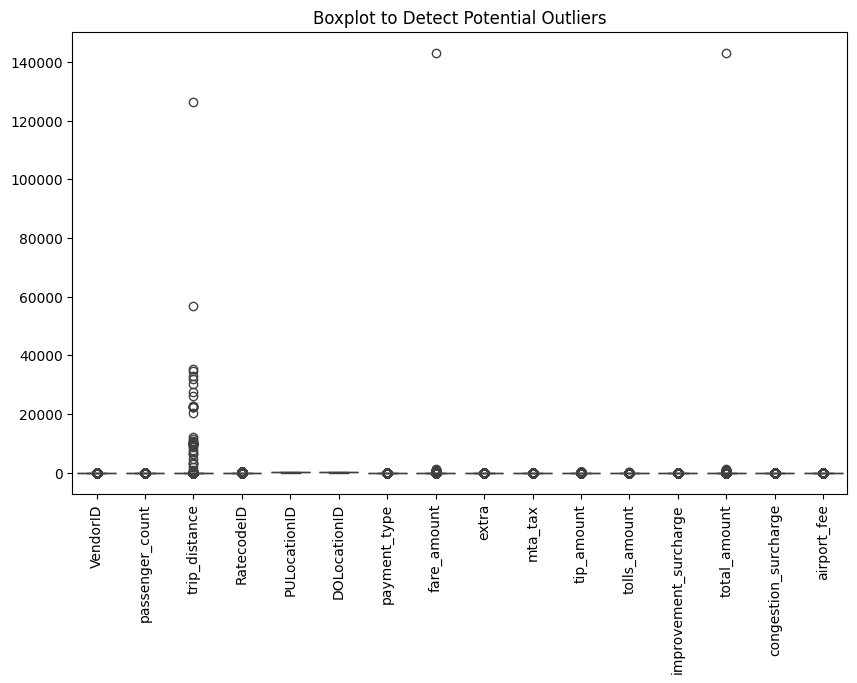

In [21]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
print(df.describe())
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=['number']))
plt.title("Boxplot to Detect Potential Outliers")
plt.xticks(rotation=90)
plt.show()

In [61]:

numeric_df = df.select_dtypes(include=['number'])

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

outliers = (numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))
outliers_count = outliers.sum()

print(f"Potential outliers detected in each column:")
print(outliers_count)


Potential outliers detected in each column:
VendorID                    444
passenger_count          454302
trip_distance            249302
RatecodeID               102267
PULocationID                  0
DOLocationID                  0
payment_type             404026
fare_amount              197413
extra                     34047
mta_tax                   17944
tip_amount               145673
tolls_amount             153802
improvement_surcharge      2259
total_amount             218083
congestion_surcharge     140954
airport_fee              160947
dtype: int64


In [23]:
#columns_with_outliers = [ 'RatecodeID',
                      #   'extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge',
                      #    'congestion_surcharge', 'airport_fee']

# Calculate the IQR for each column
#Q1 = df[columns_with_outliers].quantile(0.25)
#Q3 = df[columns_with_outliers].quantile(0.75)
#IQR = Q3 - Q1

# Remove rows with outliers
#df = df[~((df[columns_with_outliers] < (Q1 - 1.5 * IQR)) | (df[columns_with_outliers] > (Q3 + 1.5 * IQR))).any(axis=1)]



In [63]:

numeric_df = df.select_dtypes(include=['number'])

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

outliers = (numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))
outliers_count = outliers.sum()

print(f"Potential outliers detected in each column:")
print(outliers_count)


Potential outliers detected in each column:
VendorID                    444
passenger_count          448878
trip_distance            245618
RatecodeID                93497
PULocationID                  0
DOLocationID                  0
payment_type             379083
fare_amount              190770
extra                     33863
mta_tax                   12090
tip_amount               140902
tolls_amount             151335
improvement_surcharge      1374
total_amount             213779
congestion_surcharge     127996
airport_fee              158796
dtype: int64


In [62]:
df = df[(df['trip_distance'] > 0) & (df['trip_distance'] <= 100)]

# Remove zero-fare trips that don't have valid reasons
valid_payment_types = [3, 4, 6]
df = df[~((df['fare_amount'] == 0) & (~df['payment_type'].isin(valid_payment_types)))]

df.loc[df['tip_amount'] > 100, 'tip_amount'] = 100

df.loc[df['total_amount'] > 500, 'total_amount'] = 500


In [64]:
# 1. Entries where trip_distance is nearly 0 and fare_amount is more than 300
df = df[~((df['trip_distance'] < 1) & (df['fare_amount'] > 300))]

# 2. Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]

# 3. Entries where trip_distance is more than 250 miles
df = df[df['trip_distance'] <= 250]

# 4. Entries where payment_type is 0 (invalid payment type)
df = df[df['payment_type'] != 0]

print(df.head())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-02-01 00:14:06   2023-02-01 00:19:52              3.0   
1         1  2023-02-01 00:54:09   2023-02-01 01:13:13              1.0   
2         2  2023-02-01 00:14:36   2023-02-01 00:59:16              1.0   
3         1  2023-02-01 00:49:25   2023-02-01 00:53:12              1.0   
4         1  2023-02-01 00:16:02   2023-02-01 00:22:02              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.25         1.0                  N           234           114   
1           5.00         1.0                  N            48            87   
2          24.04         1.0                  N           114           121   
3           0.60         1.0                  N           246            68   
4           0.90         1.0                  N           114           148   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [66]:
# remove passenger_count > 6
df.loc[df['passenger_count'] == 0, 'passenger_count'] = 1
df = df[df['passenger_count'] <= 6]
print(df['passenger_count'].value_counts().sort_index())

passenger_count
1.0    1388173
2.0     274595
3.0      68286
4.0      37660
5.0      23755
6.0      15788
Name: count, dtype: int64


In [ ]:
# Continue with outlier handling
#data cleaned in above step and handled outliers based on condition


In [ ]:
# Do any columns need standardising?



## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [67]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'date',
 'airport_fee']

In [68]:
categorical_cols = ['VendorID', 'passenger_count', 'RatecodeID', 'store_and_fwd_flag',
                    'PULocationID', 'DOLocationID', 'payment_type']

numerical_cols = ['trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
                  'tolls_amount', 'improvement_surcharge', 'total_amount',
                  'congestion_surcharge', 'airport_fee']

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)


Categorical Columns: ['VendorID', 'passenger_count', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type']
Numerical Columns: ['trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']


In [69]:
# Extract time-based features from pickup datetime
df['hour'] = df['tpep_pickup_datetime'].dt.hour
df['weekday'] = df['tpep_pickup_datetime'].dt.day_name()
df['month'] = df['tpep_pickup_datetime'].dt.month_name()

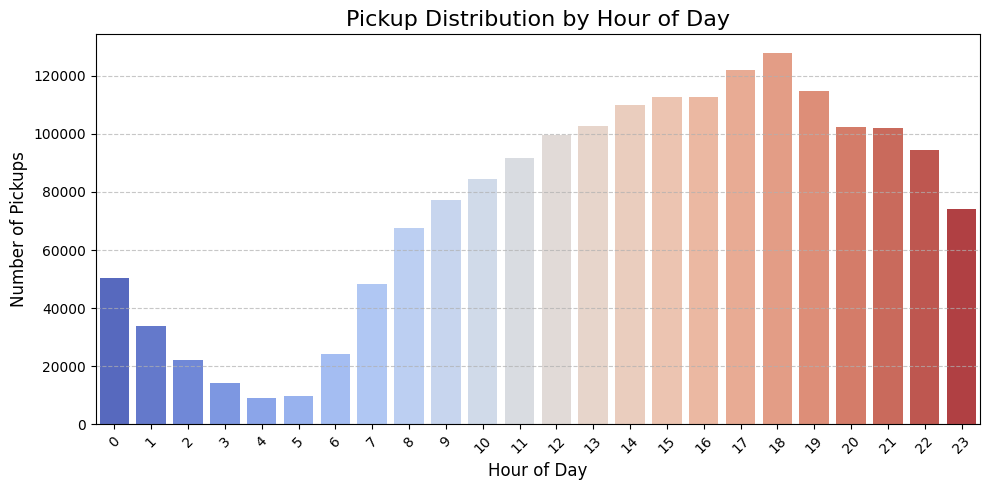

In [70]:
# Bar Chart for Pickup Distribution by Hour with custom names and color palette
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='hour', palette='coolwarm')
plt.title("Pickup Distribution by Hour of Day", fontsize=16)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Number of Pickups", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

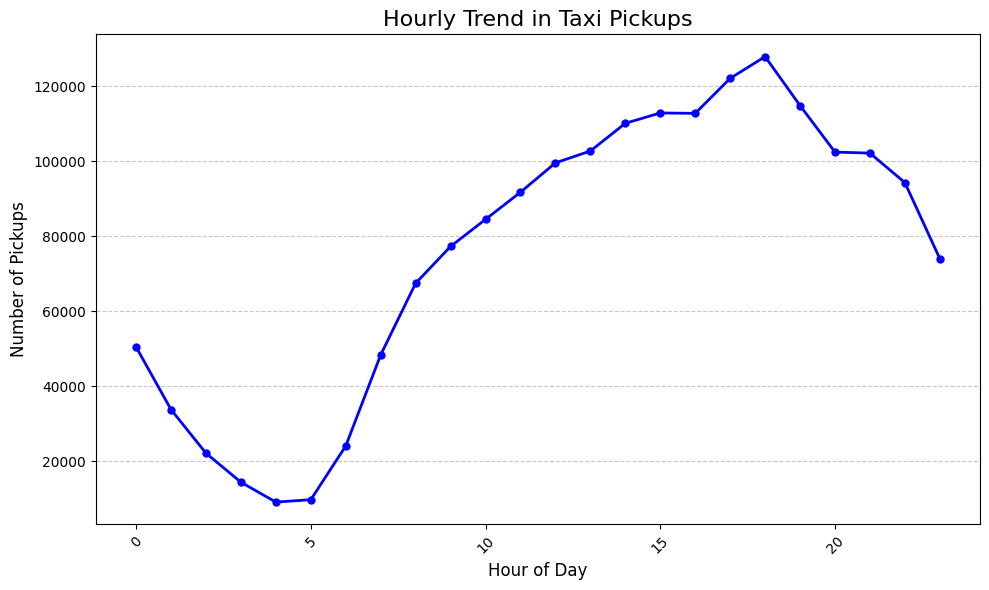

In [71]:
# Find and show the hourly trends in taxi pickups

hourly_pickups = df.groupby('hour').size()

# Plot the hourly trend for taxi pickups
plt.figure(figsize=(10, 6))
plt.plot(hourly_pickups.index, hourly_pickups.values, marker='o', color='b', linestyle='-', linewidth=2, markersize=5)
plt.title("Hourly Trend in Taxi Pickups", fontsize=16)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Number of Pickups", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



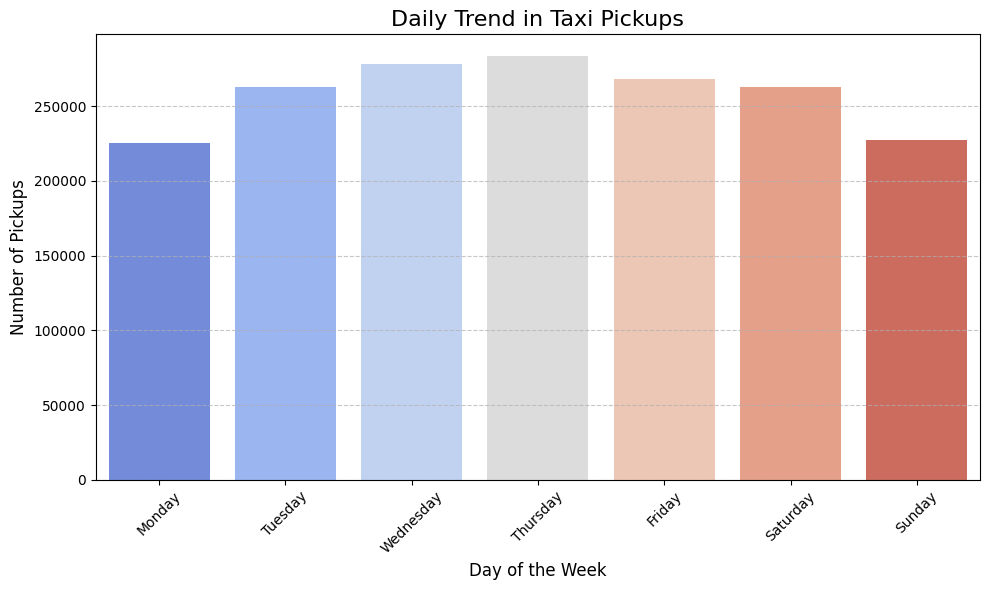

In [72]:
# Find and show the daily trends in taxi pickups (days of the week)
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
# Extract the day of the week from the pickup_datetime
df['day_of_week'] = df['tpep_pickup_datetime'].dt.day_name()
daily_pickups = df.groupby('day_of_week').size()
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_pickups = daily_pickups[ordered_days]
# Plot the daily trend for taxi pickups
plt.figure(figsize=(10, 6))
sns.barplot(x=daily_pickups.index, y=daily_pickups.values, palette='coolwarm')
plt.title("Daily Trend in Taxi Pickups", fontsize=16)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Number of Pickups", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

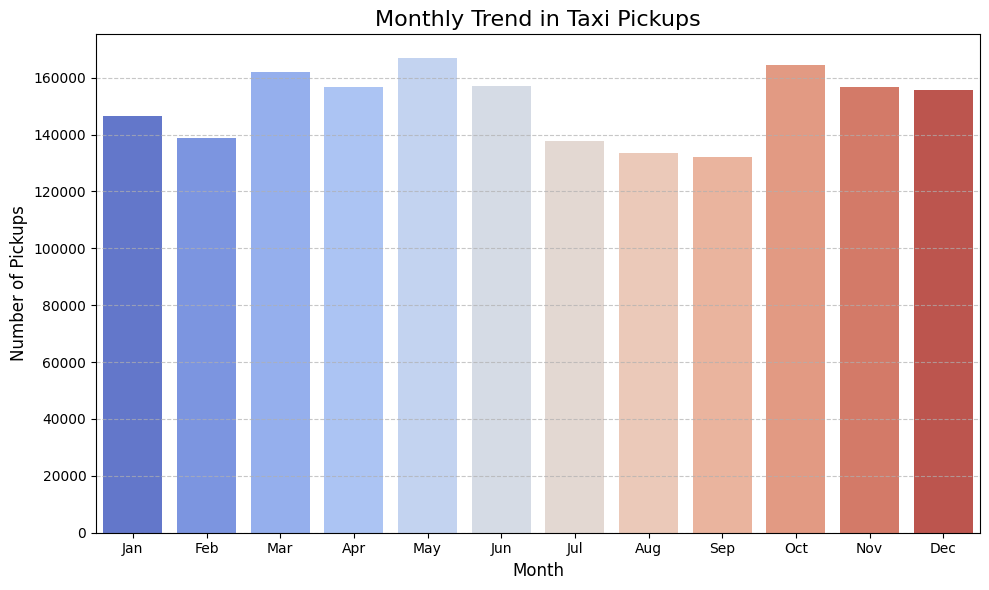

In [73]:
# Show the monthly trends in pickups
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['month'] = df['tpep_pickup_datetime'].dt.month

# Group by month and count the number of pickups
monthly_pickups = df.groupby('month').size()

# Plot the monthly trend for taxi pickups
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_pickups.index, y=monthly_pickups.values, palette='coolwarm')
plt.title("Monthly Trend in Taxi Pickups", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Pickups", fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [74]:
# Analyse the above parameters
columns= ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

for col in columns:
    zero_count = (df[col] == 0).sum()
    negative_count = (df[col] < 0).sum()
    print(f" {col} — Zeros: {zero_count}, Negatives: {negative_count}")


 fare_amount — Zeros: 130, Negatives: 0
 tip_amount — Zeros: 395358, Negatives: 0
 total_amount — Zeros: 57, Negatives: 0
 trip_distance — Zeros: 0, Negatives: 0


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [75]:
# Create a df with non zero entries for the selected parameters.
df = df[(df['fare_amount'] > 0) & (df['total_amount'] > 0) & (df['trip_distance'] > 0)]


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

            total_amount
month_year              
2022-12            13.50
2023-01       3994129.30
2023-02       3776709.48
2023-03       4555408.71
2023-04       4471683.74
2023-05       4873576.39
2023-06       4584010.24
2023-07       3985480.44
2023-08       3880387.50
2023-09       3959922.84
2023-10       4884290.38
2023-11       4549011.67
2023-12       4528680.44


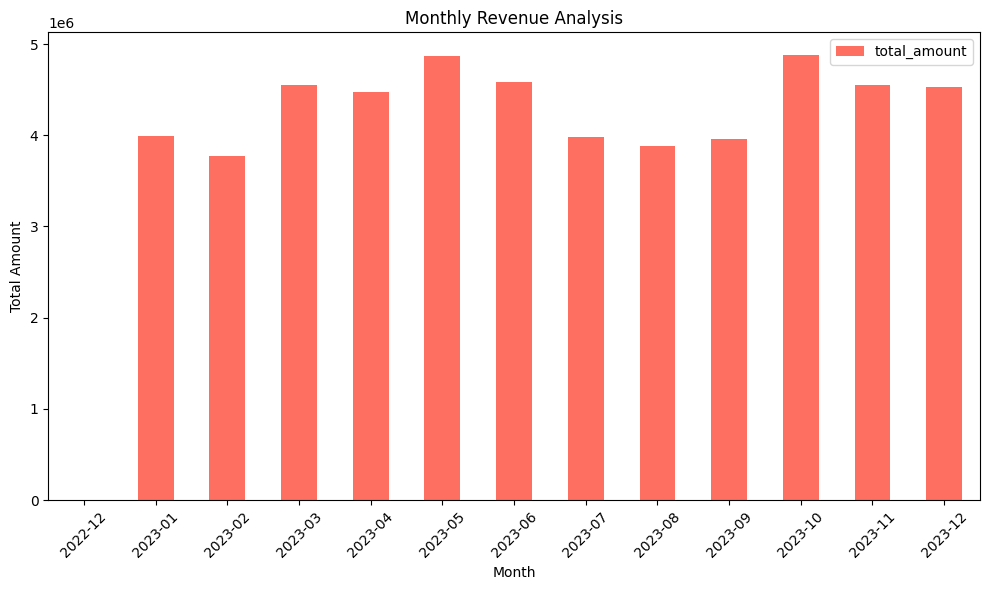

In [76]:
# Group data by month and analyse monthly revenue
df['month_year'] = df['tpep_pickup_datetime'].dt.to_period('M')
monthly_revenue = df.groupby('month_year')[['total_amount']].sum()

print(monthly_revenue)

# Optional: Plot the monthly revenue
monthly_revenue.plot(kind='bar', figsize=(10, 6), color=['#FF6F61', '#6B8E23', '#1E90FF'])
plt.title('Monthly Revenue Analysis')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

         total_amount    proportion
quarter                            
2022Q4          13.50  2.593994e-07
2023Q1    12326247.49  2.368460e-01
2023Q2    13929270.37  2.676477e-01
2023Q3    11825790.78  2.272298e-01
2023Q4    13961982.49  2.682762e-01


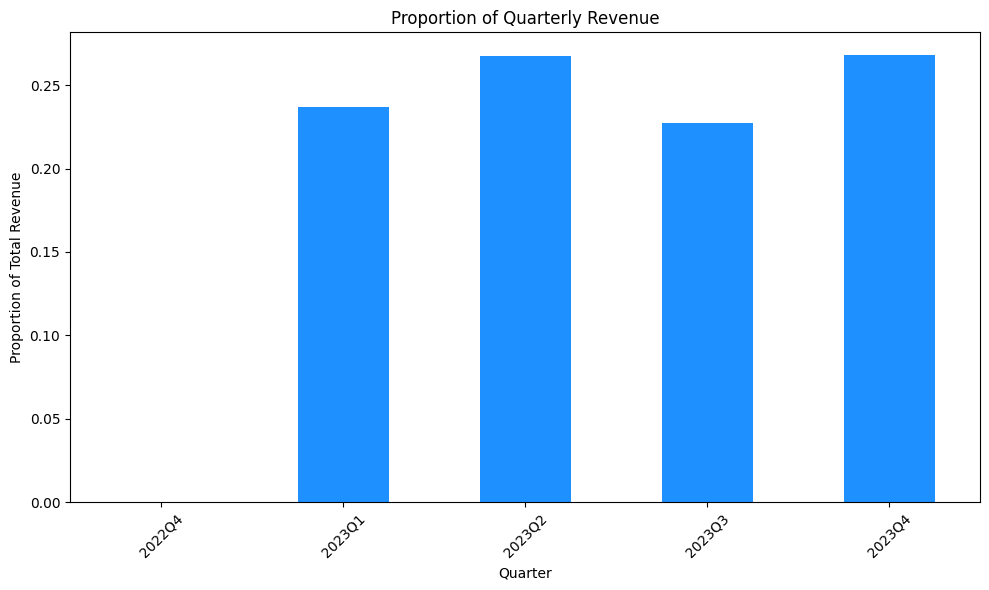

In [77]:
# Calculate proportion of each quarter

df['quarter'] = df['tpep_pickup_datetime'].dt.to_period('Q')

quarterly_revenue = df.groupby('quarter')[['total_amount']].sum()

# Calculate the total revenue across all quarters
total_revenue = quarterly_revenue[['total_amount']].sum()

# Calculate the proportion of each quarter's revenue
quarterly_revenue['proportion'] = quarterly_revenue['total_amount'] / total_revenue[0]

# Show the result
print(quarterly_revenue)

# Optional: Plot the quarterly revenue proportions
quarterly_revenue['proportion'].plot(kind='bar', figsize=(10, 6), color='#1E90FF')
plt.title('Proportion of Quarterly Revenue')
plt.xlabel('Quarter')
plt.ylabel('Proportion of Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

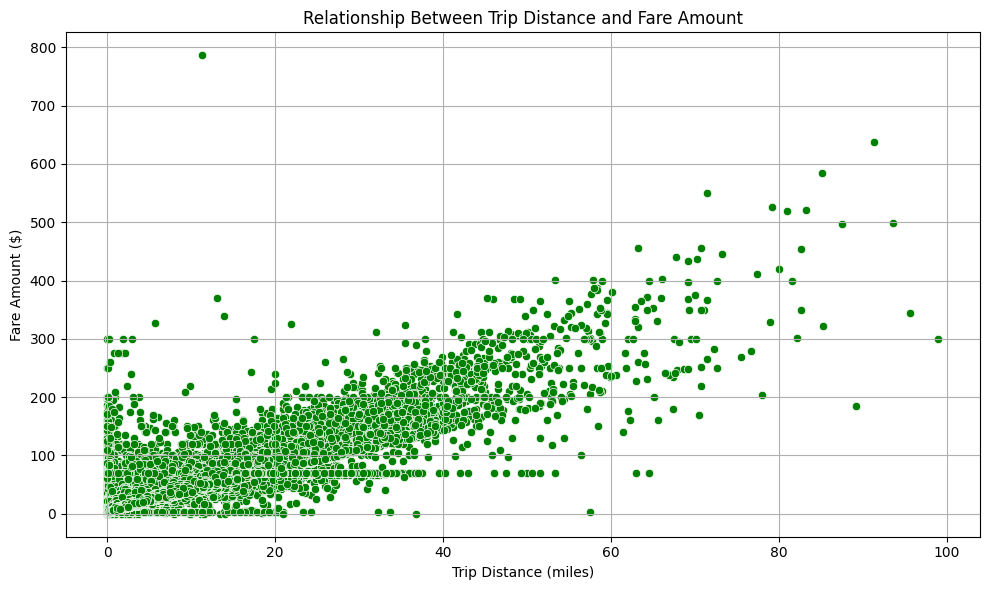

Correlation between trip_distance and fare_amount: 0.9451


In [78]:
# Show how trip fare is affected by distance
# Remove rows where trip_distance is 0
df_filtered = df[df['trip_distance'] > 0]

# Visualize the relationship between trip_distance and fare_amount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='trip_distance', y='fare_amount', color='green')
plt.title("Relationship Between Trip Distance and Fare Amount")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate the correlation between trip_distance and fare_amount
correlation = df_filtered[['trip_distance', 'fare_amount']].corr().iloc[0, 1]

print(f"Correlation between trip_distance and fare_amount: {correlation:.4f}")



**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

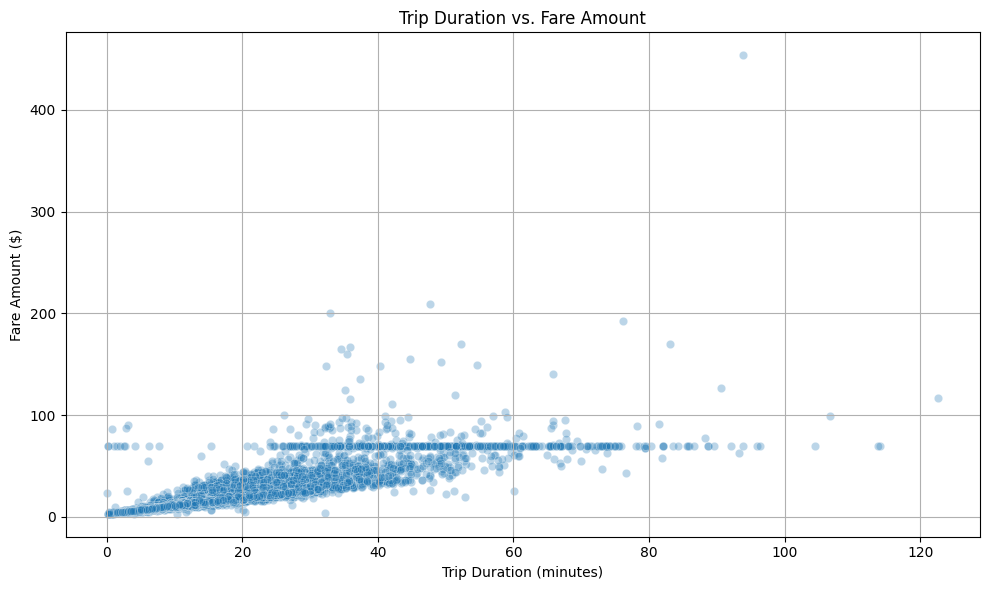

In [79]:
# Show relationship between fare and trip duration
df['trip_duration_min'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

df_duration_fare = df[(df['trip_duration_min'] > 0) & (df['trip_duration_min'] <= 180)].copy()
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_duration_fare.sample(10000, random_state=42),
    x='trip_duration_min',
    y='fare_amount',
    alpha=0.3
)

plt.title("Trip Duration vs. Fare Amount")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Fare Amount ($)")
plt.grid(True)
plt.tight_layout()
plt.show()


 Average fare by passenger count:
passenger_count
1.0    18.984629
2.0    22.025213
3.0    21.717197
4.0    23.021685
5.0    18.830288
6.0    19.080317
Name: fare_amount, dtype: float64


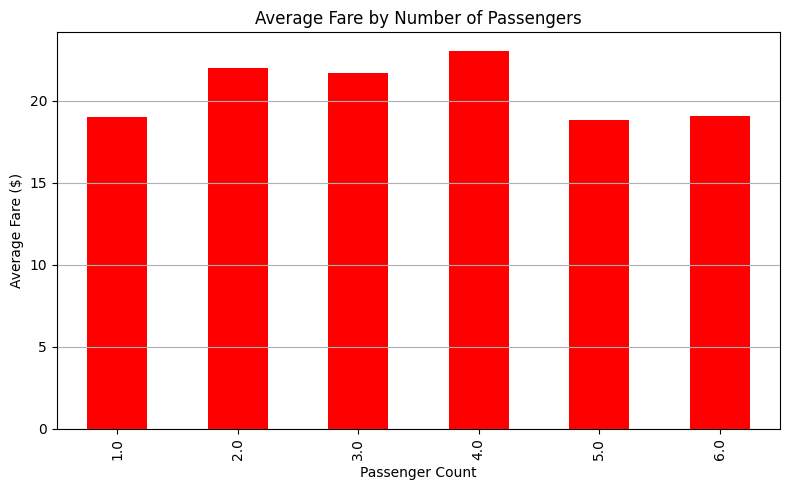

In [80]:
# Show relationship between fare and number of passengers
fare_by_passenger = df.groupby('passenger_count')['fare_amount'].mean().sort_index()

print(" Average fare by passenger count:")
print(fare_by_passenger)
plt.figure(figsize=(8, 5))
fare_by_passenger.plot(kind='bar', color='Red')

plt.title("Average Fare by Number of Passengers")
plt.xlabel("Passenger Count")
plt.ylabel("Average Fare ($)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


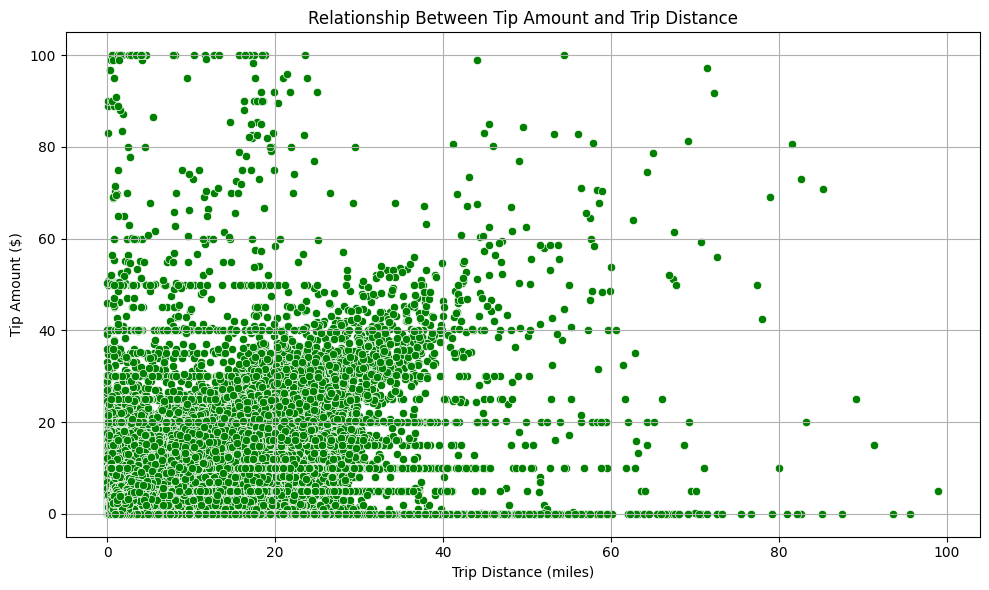

In [81]:
# Show relationship between tip and trip distance
plt.figure(figsize=(10, 6))
sns.scatterplot(df, x='trip_distance', y='tip_amount', color='green')
plt.title("Relationship Between Tip Amount and Trip Distance")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Tip Amount ($)")
plt.grid(True)
plt.tight_layout()
plt.show()



**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

Payment Type Distribution:
payment_type
Credit card    1479314
Cash            309799
Dispute          12221
No charge         6793
Name: count, dtype: int64


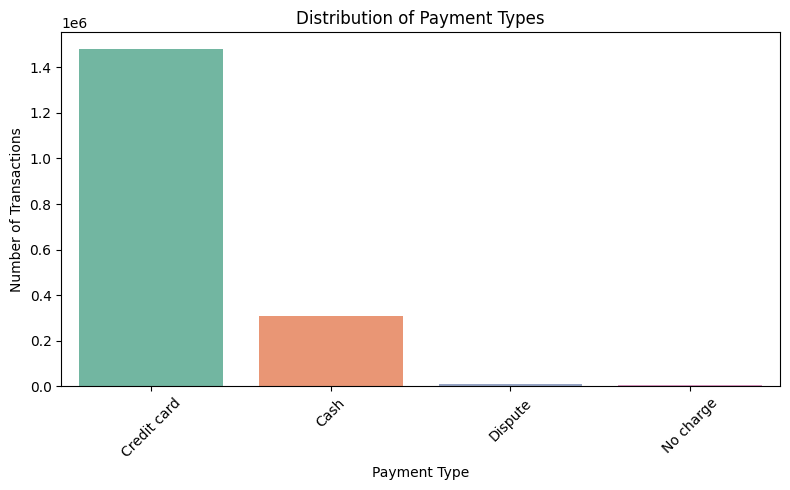

In [82]:
# Analyse the distribution of different payment types (payment_type).
payment_type_mapping = {1: 'Credit card', 2: 'Cash', 3: 'No charge', 4: 'Dispute'}
df['payment_type'] = df['payment_type'].map(payment_type_mapping)

payment_type_counts = df['payment_type'].value_counts()

print("Payment Type Distribution:")
print(payment_type_counts)

# Plot the distribution of payment types
plt.figure(figsize=(8, 5))
sns.barplot(x=payment_type_counts.index, y=payment_type_counts.values, palette='Set2')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [83]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [84]:
import geopandas as gpd

# Read the shapefile using geopandas
zones =  gpd.read_file("/content/drive/MyDrive/UpGrad/Datasets and Dictionary/taxi_zones/taxi_zones.shp")
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

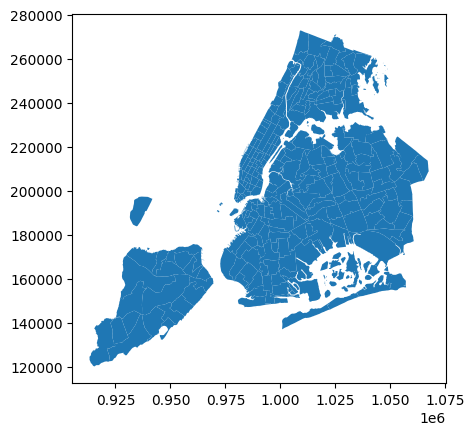

In [85]:
 print(zones.info())
 zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [86]:
# Merge zones and trip records using locationID and PULocationID
merged_pickups = df.merge(zones.rename(columns={'LocationID': 'PULocationID'}),
                          on='PULocationID',
                          how='left')

# Preview the merged data
print(merged_pickups[['PULocationID', 'zone', 'borough']].head())



   PULocationID                       zone    borough
0           234                   Union Sq  Manhattan
1            48               Clinton East  Manhattan
2           114    Greenwich Village South  Manhattan
3           246  West Chelsea/Hudson Yards  Manhattan
4           114    Greenwich Village South  Manhattan


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [87]:
# Group data by location and calculate the number of trips
trips_per_location = df.groupby('PULocationID').size().reset_index(name='total_trips')

print(trips_per_location.head())


   PULocationID  total_trips
0             1           47
1             2            2
2             3           31
3             4         1814
4             5            9


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [88]:
# Step 1: Rename LocationID in zones to match PULocationID
zones = gpd.read_file("/content/drive/MyDrive/UpGrad/Datasets and Dictionary/taxi_zones/taxi_zones.shp")
zones_pickup = zones.rename(columns={'LocationID': 'PULocationID'})

# Step 2: Merge with trip data (df_clean)
merged_pickups = df.merge(zones_pickup[['PULocationID', 'zone', 'borough']], on='PULocationID', how='left')
# Group and count number of trips by PULocationID
pickup_counts = merged_pickups.groupby('PULocationID').size().reset_index(name='trip_count')

# Merge trip counts into zones
zones_with_trips = zones.merge(pickup_counts, left_on='LocationID', right_on='PULocationID', how='left')

# Fill NaNs with 0
zones_with_trips['trip_count'] = zones_with_trips['trip_count'].fillna(0).astype(int)


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

<Figure size 1500x1000 with 0 Axes>

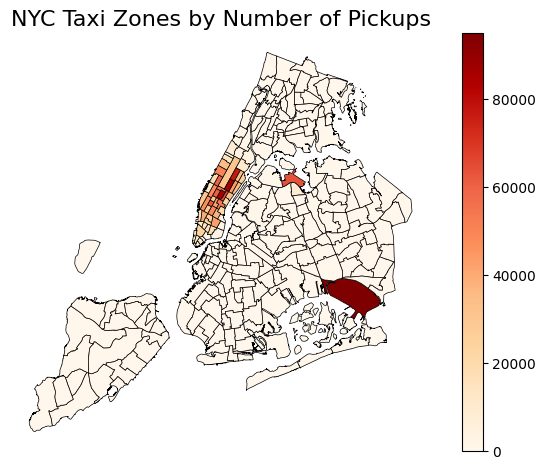

In [89]:
# Define figure and axis
plt.figure(figsize=(15, 10))
zones_with_trips.plot(
    column='trip_count',        # The column to color-code
    cmap='OrRd',                # Color map (Orange-Red gradient)
    legend=True,                # Show color legend
    edgecolor='black',          # Border color for zones
    linewidth=0.5               # Border thickness
)

# Plot the map and display it
plt.title("NYC Taxi Zones by Number of Pickups", fontsize=16)
plt.axis('off')                 # Hide axis lines
plt.tight_layout()
plt.show()

In [90]:
# can you try displaying the zones DF sorted by the number of trips?
# Sort zones by number of trips in descending order
top_zones = zones_with_trips.sort_values(by='trip_count', ascending=False)

# Display the top 10 zones
top_zones[['zone', 'borough', 'trip_count']].head(10)


zone    borough  trip_count
131                   JFK Airport     Queens       94937
236         Upper East Side South  Manhattan       86474
160                Midtown Center  Manhattan       85401
235         Upper East Side North  Manhattan       77119
161                  Midtown East  Manhattan       65211
137             LaGuardia Airport     Queens       63681
185  Penn Station/Madison Sq West  Manhattan       62990
229     Times Sq/Theatre District  Manhattan       60729
141           Lincoln Square East  Manhattan       60507
169                   Murray Hill  Manhattan       54035

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

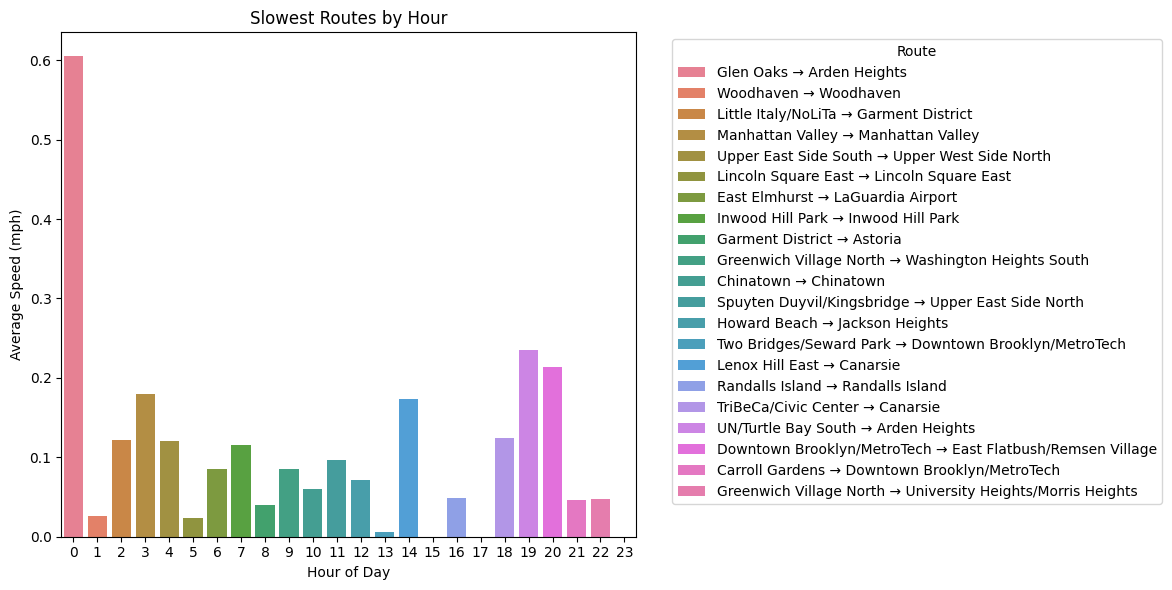

In [91]:
# Find routes which have the slowest speeds at different times of the day
# Calculate trip duration in hours
df['trip_duration_hr'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 3600

# Filter out trips with invalid durations or distances
df_speed = df[(df['trip_duration_hr'] > 0) & (df['trip_distance'] > 0)]

# Calculate speed in mph
df_speed['speed_mph'] = df_speed['trip_distance'] / df_speed['trip_duration_hr']

# Extract hour of day
df_speed['hour'] = df_speed['tpep_pickup_datetime'].dt.hour

# Create route ID
df_speed['route'] = df_speed['PULocationID'].astype(str) + ' → ' + df_speed['DOLocationID'].astype(str)

# Group by route and hour, calculate average speed
slow_routes = df_speed.groupby(['hour', 'route'])['speed_mph'].mean().reset_index()

# Find slowest route per hour
slowest_by_hour = slow_routes.loc[slow_routes.groupby('hour')['speed_mph'].idxmin()]

# Map pickup and dropoff zones
location_lookup = zones.set_index('LocationID')['zone'].to_dict()
slowest_by_hour[['pickup_id', 'dropoff_id']] = slowest_by_hour['route'].str.split(' → ', expand=True).astype(int)
slowest_by_hour['pickup_zone'] = slowest_by_hour['pickup_id'].map(location_lookup)
slowest_by_hour['dropoff_zone'] = slowest_by_hour['dropoff_id'].map(location_lookup)

# Create route name
slowest_by_hour['route_name'] = slowest_by_hour['pickup_zone'] + ' → ' + slowest_by_hour['dropoff_zone']

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(data=slowest_by_hour, x='hour', y='speed_mph', hue='route_name', dodge=False)

plt.title("Slowest Routes by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Average Speed (mph)")
plt.xticks(rotation=0)
plt.legend(title="Route", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

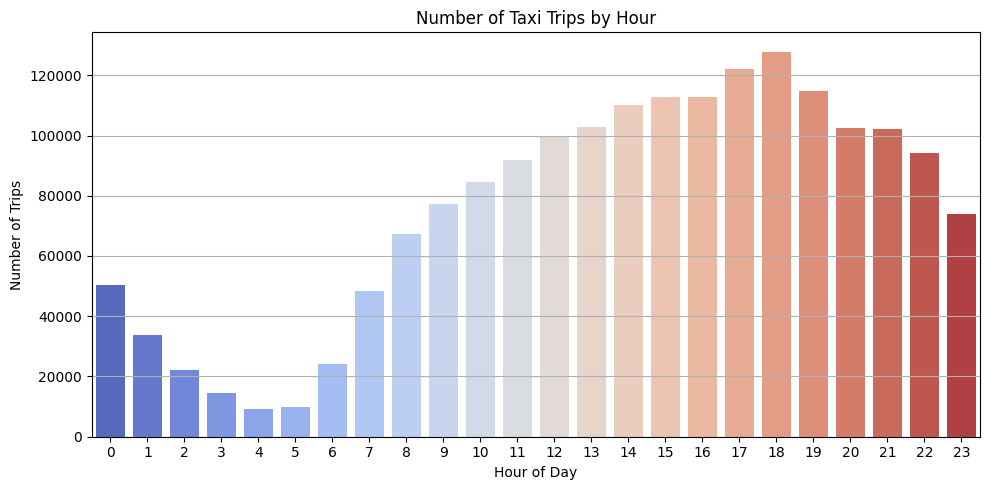

In [92]:
# Visualise the number of trips per hour and find the busiest hour
df['hour'] = df['tpep_pickup_datetime'].dt.hour

trips_per_hour = df['hour'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=trips_per_hour.index, y=trips_per_hour.values, palette='coolwarm')

plt.title("Number of Taxi Trips by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [93]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.10
trips_per_hour_scaled = (trips_per_hour / sample_fraction).round().astype(int)
print("Estimated Total Trips by Hour (10% Sampling):")
print(trips_per_hour_scaled)

busiest_hour_scaled = trips_per_hour_scaled.idxmax()
max_trips = trips_per_hour_scaled.max()
print(f"Estimated busiest hour: {busiest_hour_scaled}:00 with ~{max_trips:,} trips")



Estimated Total Trips by Hour (10% Sampling):
hour
0      504450
1      337460
2      221230
3      143760
4       90840
5       97240
6      240500
7      483410
8      674320
9      772500
10     844660
11     917100
12     995290
13    1026820
14    1100730
15    1128290
16    1127300
17    1220650
18    1278630
19    1148110
20    1024100
21    1021300
22     942690
23     739890
Name: count, dtype: int64
Estimated busiest hour: 18:00 with ~1,278,630 trips


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

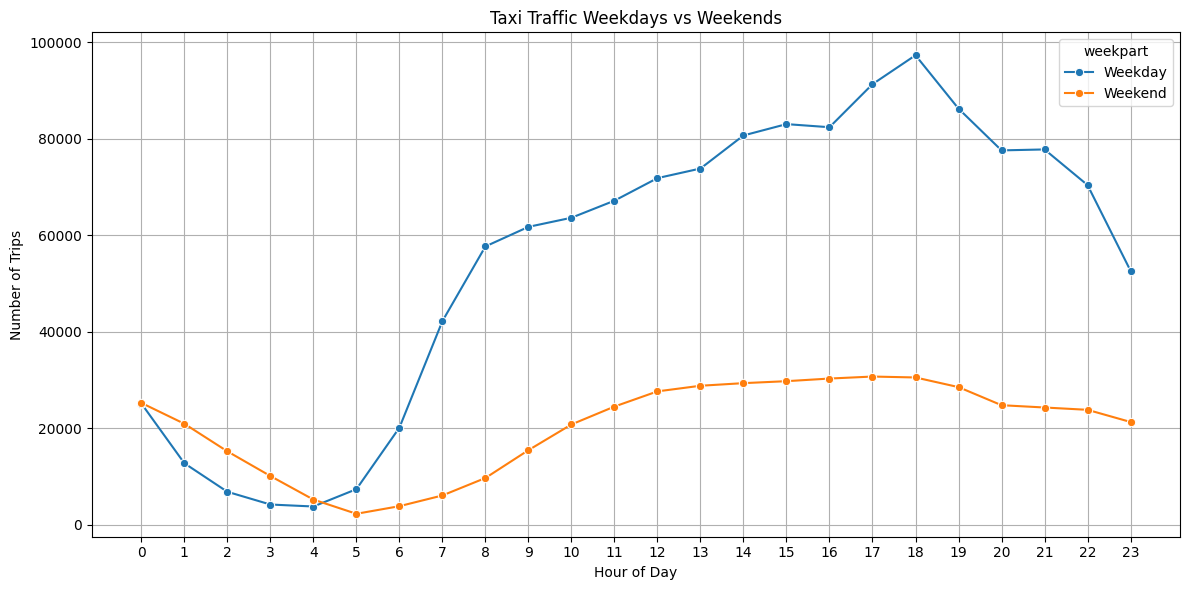

In [95]:
# Compare traffic trends for the week days and weekends
# Extract weekday name and classify as Weekday or Weekend
df['weekpart'] = df['tpep_pickup_datetime'].dt.day_name().apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

# Count number of trips by hour and weekpart
trips_by_hour_weekpart = df.groupby(['hour', 'weekpart']).size().reset_index(name='trip_count')

# Plot the result
plt.figure(figsize=(12, 6))
sns.lineplot(data=trips_by_hour_weekpart, x='hour', y='trip_count', hue='weekpart', marker='o')

plt.title("Taxi Traffic Weekdays vs Weekends")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()



What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

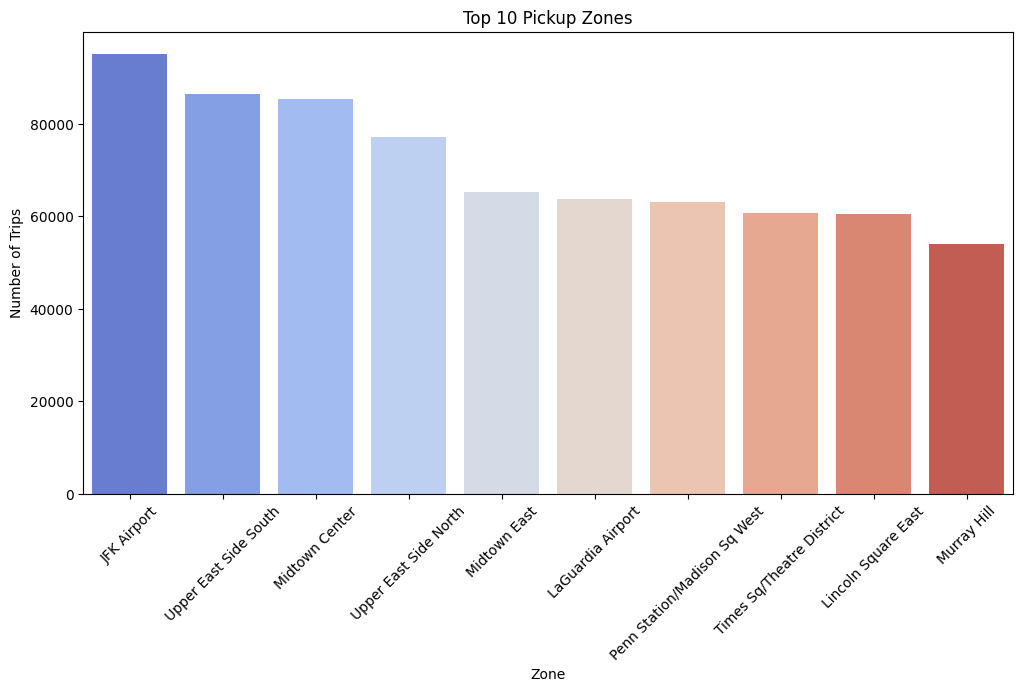

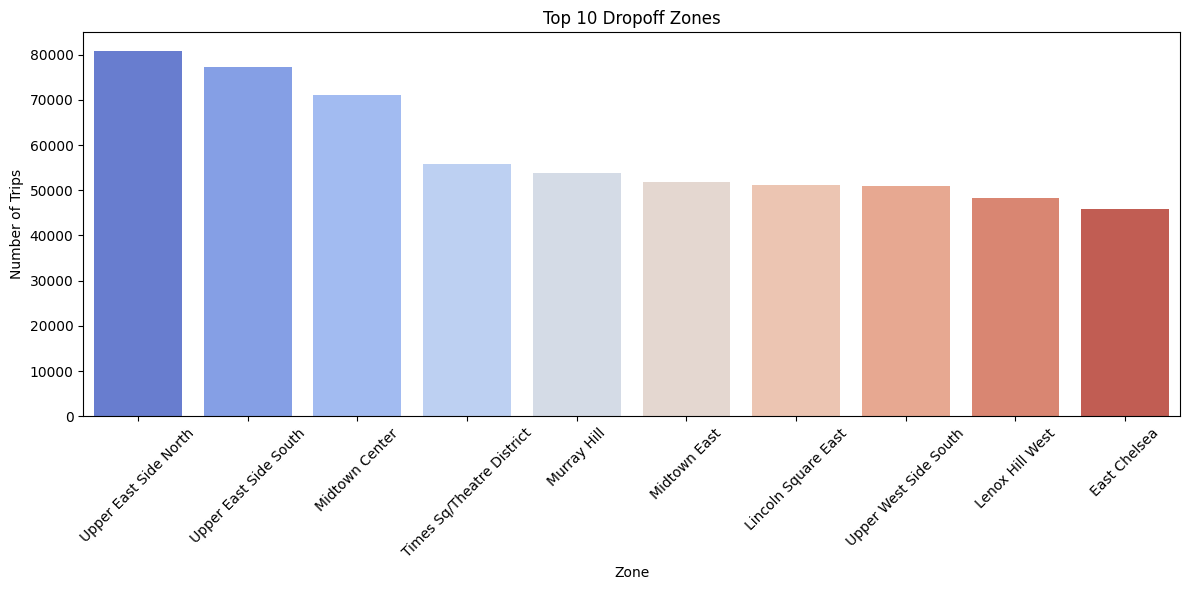

In [96]:
# Find top 10 pickup and dropoff zones
zones_pickup = zones.rename(columns={'LocationID': 'PULocationID', 'zone': 'pickup_zone'})
zones_dropoff = zones.rename(columns={'LocationID': 'DOLocationID', 'zone': 'dropoff_zone'})

df_zones = df.merge(zones_pickup[['PULocationID', 'pickup_zone']], on='PULocationID', how='left') \
             .merge(zones_dropoff[['DOLocationID', 'dropoff_zone']], on='DOLocationID', how='left')


top_pickup_zones = df_zones['pickup_zone'].value_counts().head(10)
top_dropoff_zones = df_zones['dropoff_zone'].value_counts().head(10)


plt.figure(figsize=(12, 6))
sns.barplot(x=top_pickup_zones.index, y=top_pickup_zones.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Top 10 Pickup Zones")
plt.xlabel("Zone")
plt.ylabel("Number of Trips")

plt.figure(figsize=(12, 6))
sns.barplot(x=top_dropoff_zones.index, y=top_dropoff_zones.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Top 10 Dropoff Zones")
plt.xlabel("Zone")
plt.ylabel("Number of Trips")

plt.tight_layout()
plt.show()



**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [97]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_counts = df_zones['pickup_zone'].value_counts().rename("pickup_count")
dropoff_counts = df_zones['dropoff_zone'].value_counts().rename("dropoff_count")
zone_ratios = pd.concat([pickup_counts, dropoff_counts], axis=1).fillna(0)
zone_ratios['pickup_dropoff_ratio'] = zone_ratios['pickup_count'] / zone_ratios['dropoff_count'].replace(0, 1)
top_10_ratio = zone_ratios.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10)
bottom_10_ratio = zone_ratios.sort_values(by='pickup_dropoff_ratio').head(10)
print(" Top 10 Zones (More Pickups than Drop-offs):")
print(top_10_ratio[['pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])

print(" Bottom 10 Zones (More Drop-offs than Pickups):")
print(bottom_10_ratio[['pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])


 Top 10 Zones (More Pickups than Drop-offs):
                              pickup_count  dropoff_count  \
East Elmhurst                       8205.0          868.0   
JFK Airport                        95127.0        19328.0   
LaGuardia Airport                  63784.0        21786.0   
Rikers Island                          2.0            0.0   
Penn Station/Madison Sq West       62999.0        39759.0   
Greenwich Village South            23985.0        17427.0   
Central Park                       30603.0        22241.0   
West Village                       40209.0        30270.0   
Midtown East                       65215.0        51856.0   
Midtown Center                     85408.0        71153.0   

                              pickup_dropoff_ratio  
East Elmhurst                             9.452765  
JFK Airport                               4.921720  
LaGuardia Airport                         2.927752  
Rikers Island                             2.000000  
Penn Station/Madis

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

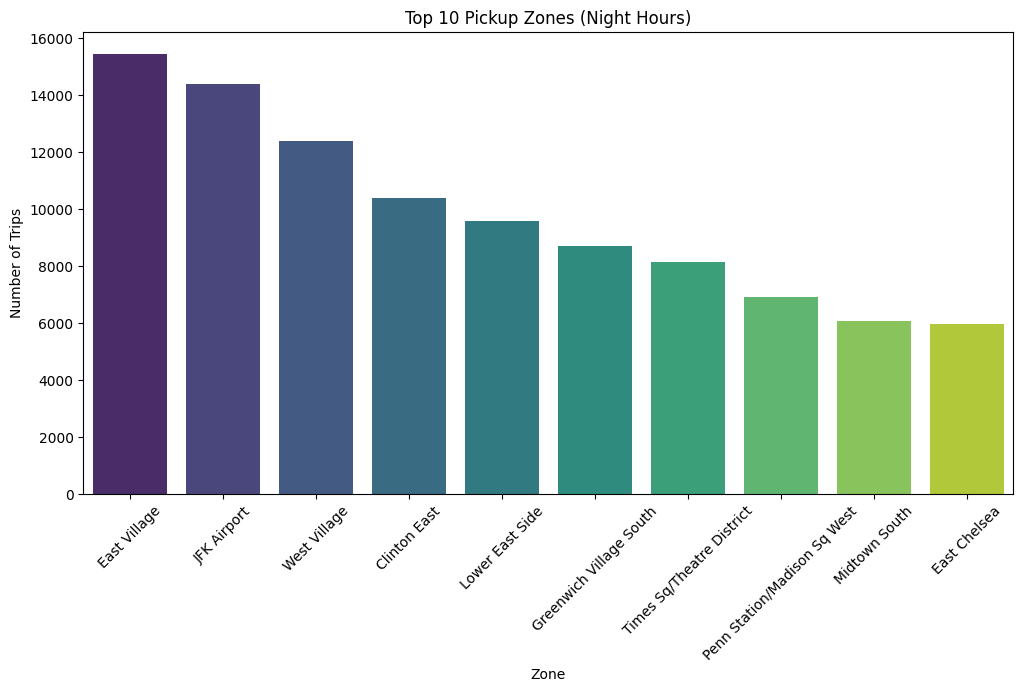

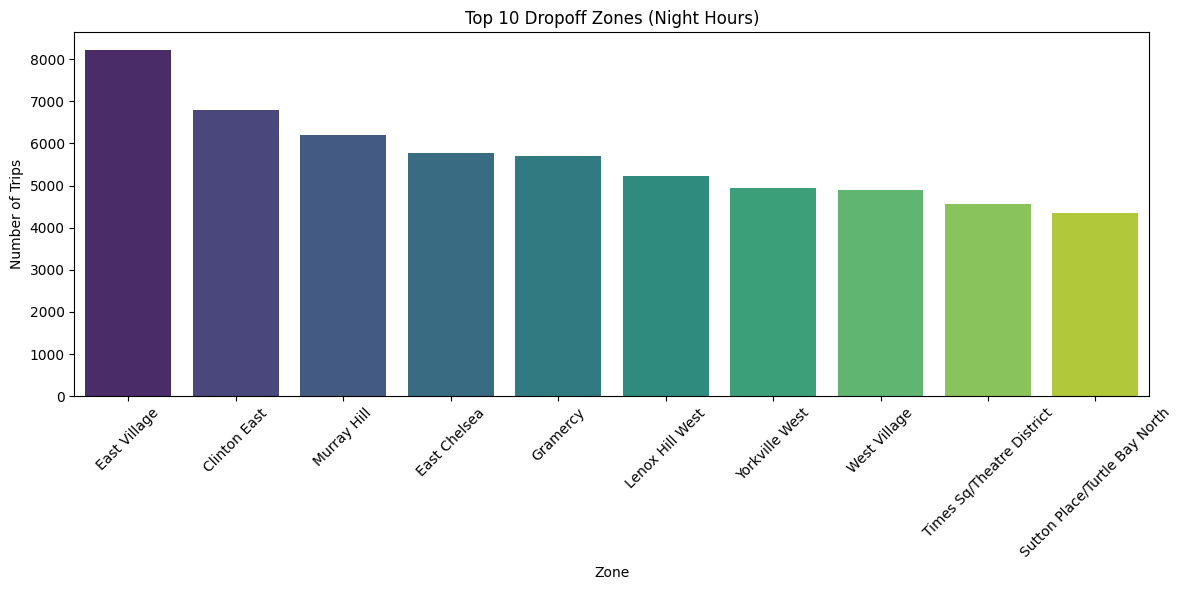

In [98]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

df['hour'] = df['tpep_pickup_datetime'].dt.hour

night_hours_df = df[(df['hour'] >= 23) | (df['hour'] <= 5)]
zones_pickup = zones.rename(columns={'LocationID': 'PULocationID', 'zone': 'pickup_zone'})
zones_dropoff = zones.rename(columns={'LocationID': 'DOLocationID', 'zone': 'dropoff_zone'})

df_zones_night = night_hours_df.merge(zones_pickup[['PULocationID', 'pickup_zone']], on='PULocationID', how='left') \
                                .merge(zones_dropoff[['DOLocationID', 'dropoff_zone']], on='DOLocationID', how='left')
top_pickup_zones_night = df_zones_night['pickup_zone'].value_counts().head(10)
top_dropoff_zones_night = df_zones_night['dropoff_zone'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_pickup_zones_night.index, y=top_pickup_zones_night.values, palette='viridis')
plt.xticks(rotation=45)
plt.title("Top 10 Pickup Zones (Night Hours)")
plt.xlabel("Zone")
plt.ylabel("Number of Trips")

plt.figure(figsize=(12, 6))
sns.barplot(x=top_dropoff_zones_night.index, y=top_dropoff_zones_night.values, palette='viridis')
plt.xticks(rotation=45)
plt.title("Top 10 Dropoff Zones (Night Hours)")
plt.xlabel("Zone")
plt.ylabel("Number of Trips")

plt.tight_layout()
plt.show()


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [100]:
# Filter for night hours (11 PM to 5 AM)
day_trips = df[(df['hour'] > 5) & (df['hour'] < 23)]
night_revenue = night_hours_df ['fare_amount'].sum()
day_revenue = day_trips['fare_amount'].sum()
print("Total Revenue for Night Hours:", night_revenue)
print("Total Revenue for Day Hours:", day_revenue)
revenue_share = (night_revenue / (night_revenue + day_revenue)) * 100
print("Revenue Share for Night Hours:", revenue_share, "%")
revenue_share = (day_revenue / (night_revenue + day_revenue)) * 100
print("Revenue Share for Day Hours:", revenue_share, "%")


Total Revenue for Night Hours: 4292704.159999999
Total Revenue for Day Hours: 31205280.82
Revenue Share for Night Hours: 12.092810795932674 %
Revenue Share for Day Hours: 87.90718920406734 %


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

 Average Fare per Mile per Passenger by Passenger Count:
passenger_count
1.0    10.86
2.0     6.43
3.0     3.91
4.0     4.35
5.0     1.71
6.0     1.35
Name: fare_per_mile_per_passenger, dtype: float64


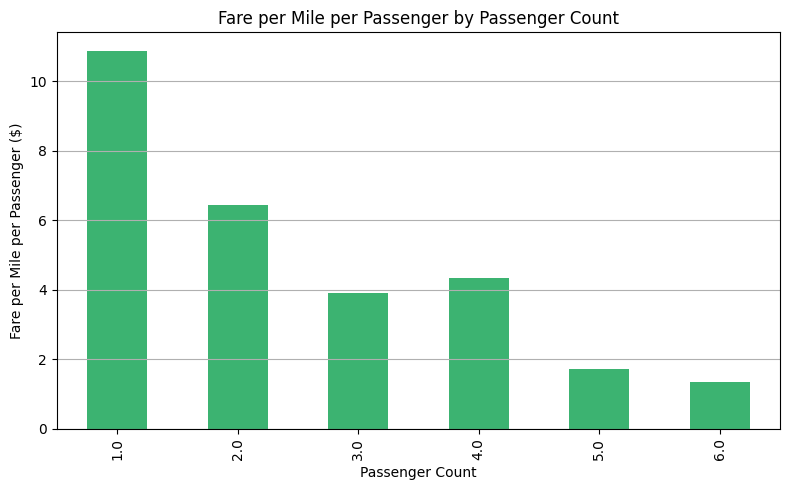

In [101]:
# Analyse the fare per mile per passenger for different passenger counts
df_fare_analysis = df[
    (df['trip_distance'] > 0) &
    (df['fare_amount'] > 0) &
    (df['passenger_count'] > 0)
].copy()
# Calculating fare per mile per passenger
df_fare_analysis['fare_per_mile_per_passenger'] = df_fare_analysis['fare_amount'] / (df_fare_analysis['trip_distance'] * df_fare_analysis['passenger_count'])
# Grouping and calculating average fare per mile per passenger
fare_efficiency = df_fare_analysis.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().round(2)

# Displaying the result
print(" Average Fare per Mile per Passenger by Passenger Count:")
print(fare_efficiency)
plt.figure(figsize=(8, 5))
fare_efficiency.plot(kind='bar', color='mediumseagreen')

plt.title("Fare per Mile per Passenger by Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("Fare per Mile per Passenger ($)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()




**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

Average Fare per Mile by Day of the Week:
weekday
Monday       10.99
Tuesday      11.39
Wednesday    11.11
Thursday     11.27
Friday       10.90
Saturday     10.93
Sunday       12.53
Name: fare_per_mile, dtype: float64


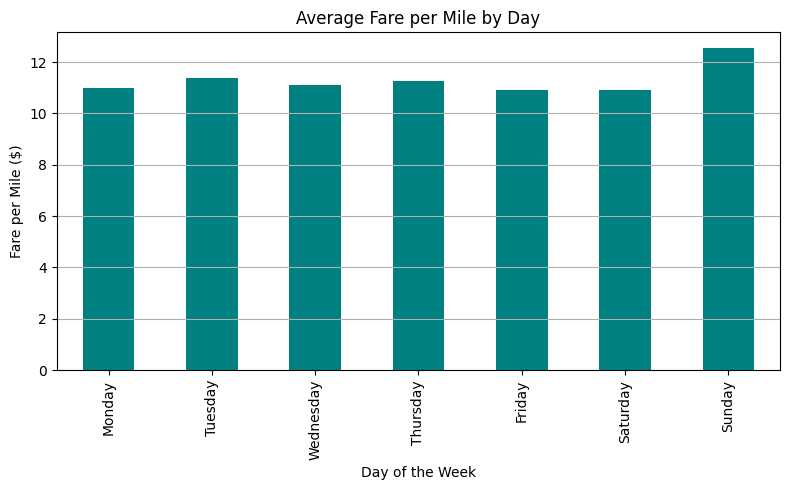


Average Fare per Mile by Hour of Day:
hour
0     10.53
1     11.27
2      9.94
3     10.87
4     14.00
5     14.24
6     11.26
7     10.29
8     10.39
9     10.39
10    10.70
11    10.97
12    12.06
13    12.01
14    11.61
15    12.51
16    13.91
17    11.96
18    11.54
19    11.62
20     9.59
21     9.52
22    10.15
23    10.73
Name: fare_per_mile, dtype: float64


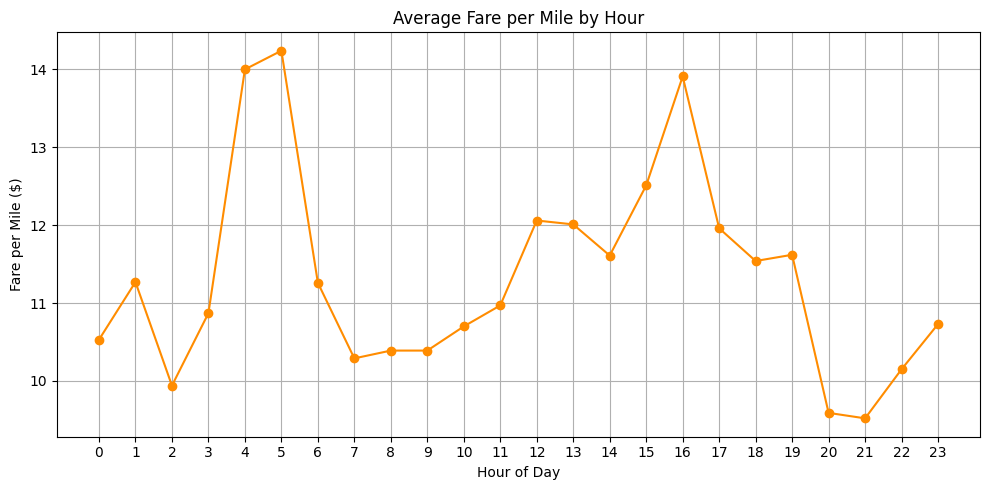

In [102]:
# Compare the average fare per mile for different days and for different times of the day
df_fare_mile = df[(df['fare_amount'] > 0) & (df['trip_distance'] > 0)].copy()

df_fare_mile['fare_per_mile'] = df_fare_mile['fare_amount'] / df_fare_mile['trip_distance']

df_fare_mile['weekday'] = df_fare_mile['tpep_pickup_datetime'].dt.day_name()
fare_by_day = df_fare_mile.groupby('weekday')['fare_per_mile'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).round(2)

print("Average Fare per Mile by Day of the Week:")
print(fare_by_day)

fare_by_day.plot(kind='bar', color='teal', figsize=(8, 5), title='Average Fare per Mile by Day')
plt.ylabel('Fare per Mile ($)')
plt.xlabel('Day of the Week')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

df_fare_mile['hour'] = df_fare_mile['tpep_pickup_datetime'].dt.hour
fare_by_hour = df_fare_mile.groupby('hour')['fare_per_mile'].mean().round(2)

print("\nAverage Fare per Mile by Hour of Day:")
print(fare_by_hour)

fare_by_hour.plot(kind='line', marker='o', color='darkorange', figsize=(10, 5), title='Average Fare per Mile by Hour')
plt.ylabel('Fare per Mile ($)')
plt.xlabel('Hour of Day')
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

Average Fare per Mile by Vendor:
VendorID
CMT          8.13
VeriFone    12.40
Name: fare_per_mile, dtype: float64


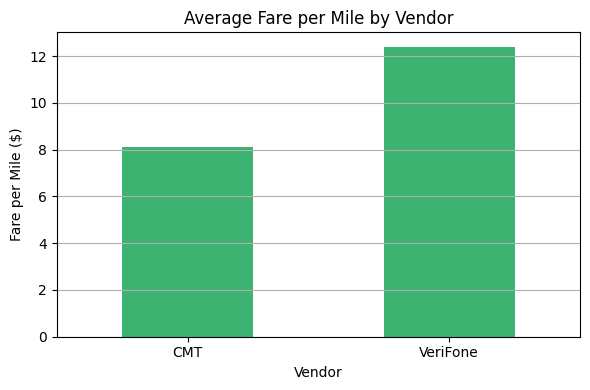

In [103]:
# Compare fare per mile for different vendors
df_vendor_fare = df[(df['fare_amount'] > 0) & (df['trip_distance'] > 0)].copy()
df_vendor_fare['fare_per_mile'] = df_vendor_fare['fare_amount'] / df_vendor_fare['trip_distance']
fare_by_vendor = df_vendor_fare.groupby('VendorID')['fare_per_mile'].mean().round(2)

vendor_names = {1: 'CMT', 2: 'VeriFone'}
fare_by_vendor.index = fare_by_vendor.index.map(vendor_names)

print("Average Fare per Mile by Vendor:")
print(fare_by_vendor)
fare_by_vendor.plot(kind='bar', color='mediumseagreen', figsize=(6, 4))

plt.title("Average Fare per Mile by Vendor")
plt.xlabel("Vendor")
plt.ylabel("Fare per Mile ($)")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


Tiered Average Fare per Mile by Vendor:
distance_tier  0–2 miles  2–5 miles  >5 miles
VendorID                                     
CMT                 9.93       6.38      4.43
VeriFone           17.93       6.55      4.50


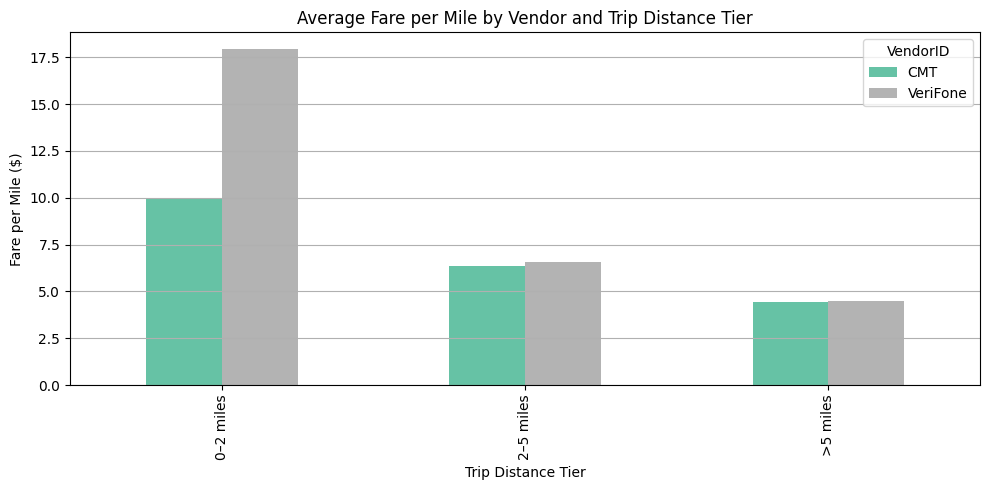

In [104]:
# Defining distance tiers
df_tiered = df[(df['fare_amount'] > 0) & (df['trip_distance'] > 0)].copy()
df_tiered['distance_tier'] = pd.cut(
    df_tiered['trip_distance'],
    bins=[0, 2, 5, float('inf')],
    labels=['0–2 miles', '2–5 miles', '>5 miles']
)
df_tiered['fare_per_mile'] = df_tiered['fare_amount'] / df_tiered['trip_distance']
tiered_fare = df_tiered.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().round(2).unstack()
vendor_map = {1: 'CMT', 2: 'VeriFone'}
tiered_fare.index = tiered_fare.index.map(vendor_map)

print("Tiered Average Fare per Mile by Vendor:")
print(tiered_fare)

tiered_fare.T.plot(kind='bar', figsize=(10, 5), colormap='Set2')
plt.title("Average Fare per Mile by Vendor and Trip Distance Tier")
plt.ylabel("Fare per Mile ($)")
plt.xlabel("Trip Distance Tier")
plt.grid(axis='y')
plt.tight_layout()
plt.show()



##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

 Tip % by Distance Tier:
distance_tier
0–2 mi     22.41
2–5 mi     18.76
5–10 mi    19.53
>10 mi     15.80
Name: tip_percent, dtype: float64


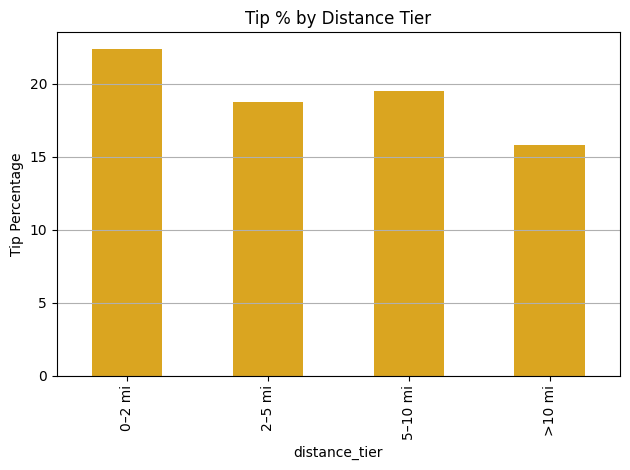


 Tip % by Passenger Count:
passenger_count
1.0    20.93
2.0    19.73
3.0    19.02
4.0    17.46
5.0    20.49
6.0    20.60
Name: tip_percent, dtype: float64


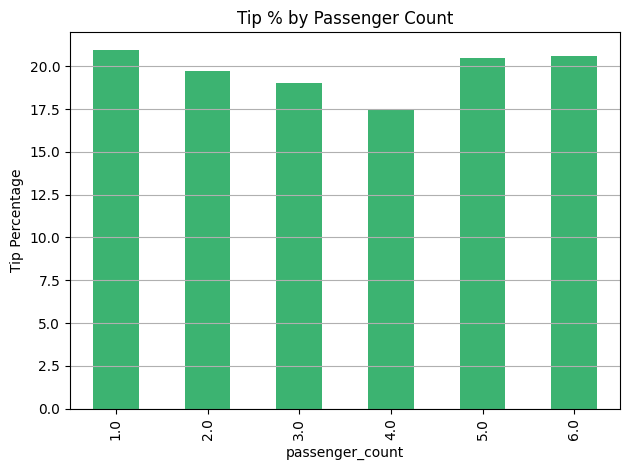


Tip % by Hour of Day:
hour
0     20.50
1     20.66
2     20.65
3     20.37
4     18.18
5     17.49
6     18.47
7     19.61
8     20.05
9     19.70
10    19.24
11    19.20
12    19.13
13    19.05
14    19.03
15    19.00
16    20.91
17    24.52
18    22.24
19    22.18
20    21.50
21    21.52
22    21.30
23    20.65
Name: tip_percent, dtype: float64


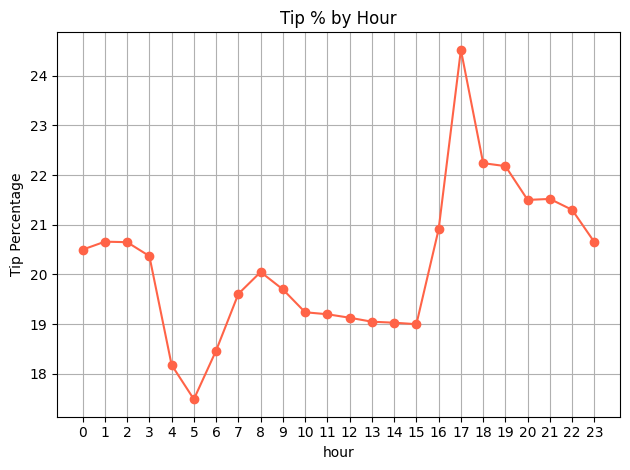

In [105]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

df_tip = df[(df['fare_amount'] > 0) & (df['tip_amount'] >= 0)].copy()

df_tip['tip_percent'] = (df_tip['tip_amount'] / df_tip['fare_amount']) * 100
df_tip['distance_tier'] = pd.cut(
    df_tip['trip_distance'],
    bins=[0, 2, 5, 10, float('inf')],
    labels=['0–2 mi', '2–5 mi', '5–10 mi', '>10 mi']
)

tip_by_distance = df_tip.groupby('distance_tier')['tip_percent'].mean().round(2)

print(" Tip % by Distance Tier:")
print(tip_by_distance)
tip_by_distance.plot(kind='bar', color='goldenrod', title='Tip % by Distance Tier')
plt.ylabel("Tip Percentage")
plt.grid(axis='y')
plt.tight_layout()
plt.show()
tip_by_passenger = df_tip.groupby('passenger_count')['tip_percent'].mean().round(2)

print("\n Tip % by Passenger Count:")
print(tip_by_passenger)
tip_by_passenger.plot(kind='bar', color='mediumseagreen', title='Tip % by Passenger Count')
plt.ylabel("Tip Percentage")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

df_tip['hour'] = df_tip['tpep_pickup_datetime'].dt.hour

tip_by_hour = df_tip.groupby('hour')['tip_percent'].mean().round(2)

print("\nTip % by Hour of Day:")
print(tip_by_hour)

tip_by_hour.plot(kind='line', marker='o', color='tomato', title='Tip % by Hour')
plt.ylabel("Tip Percentage")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

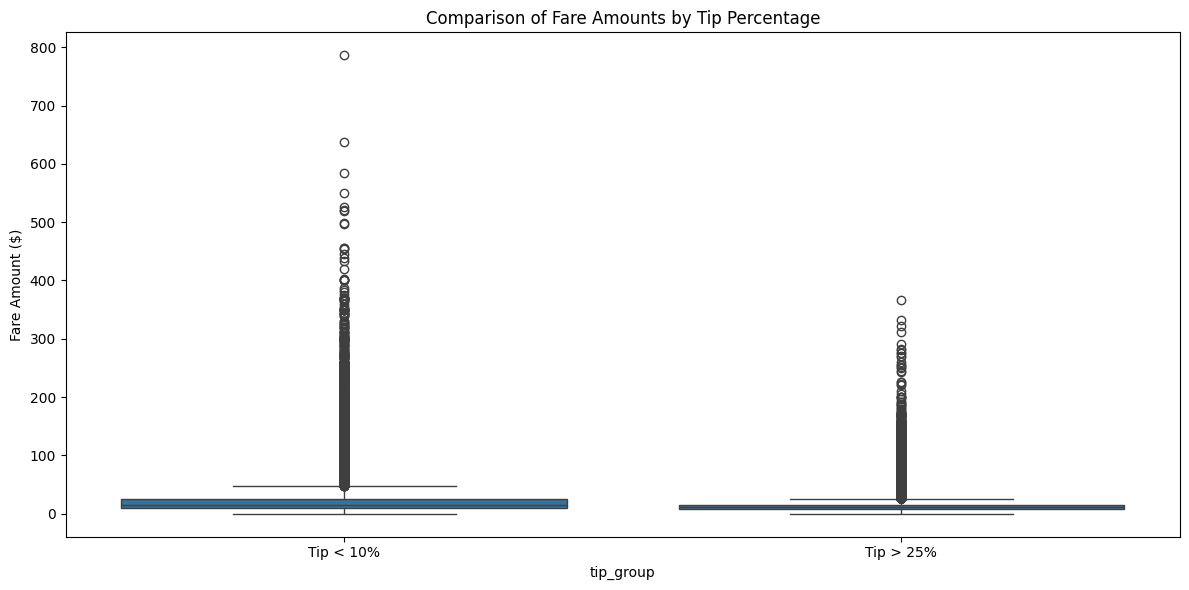

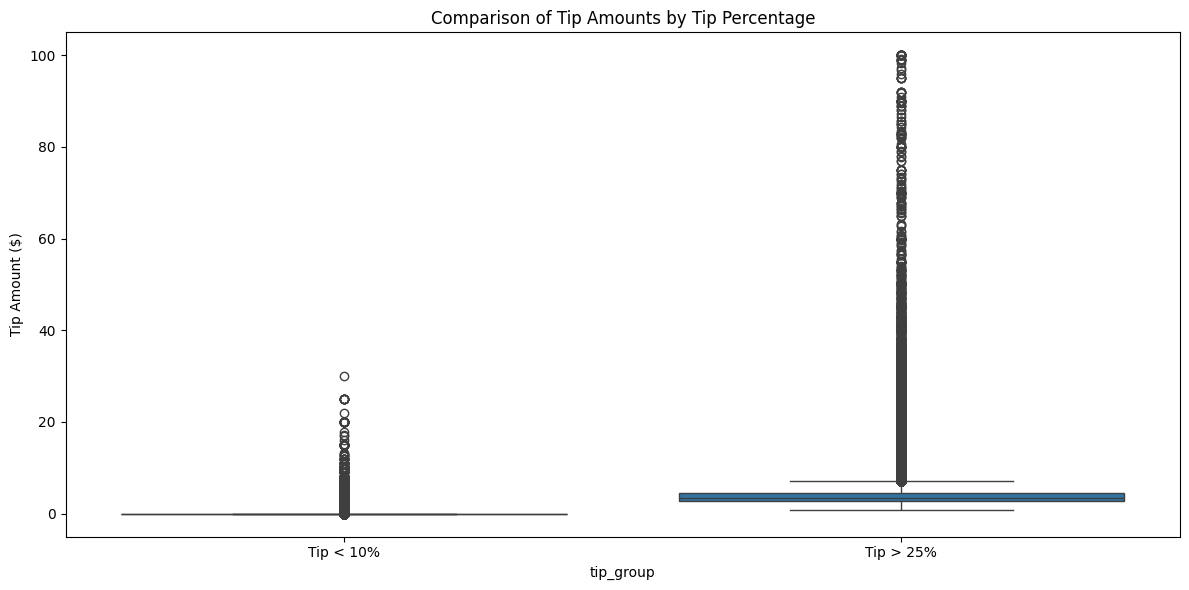

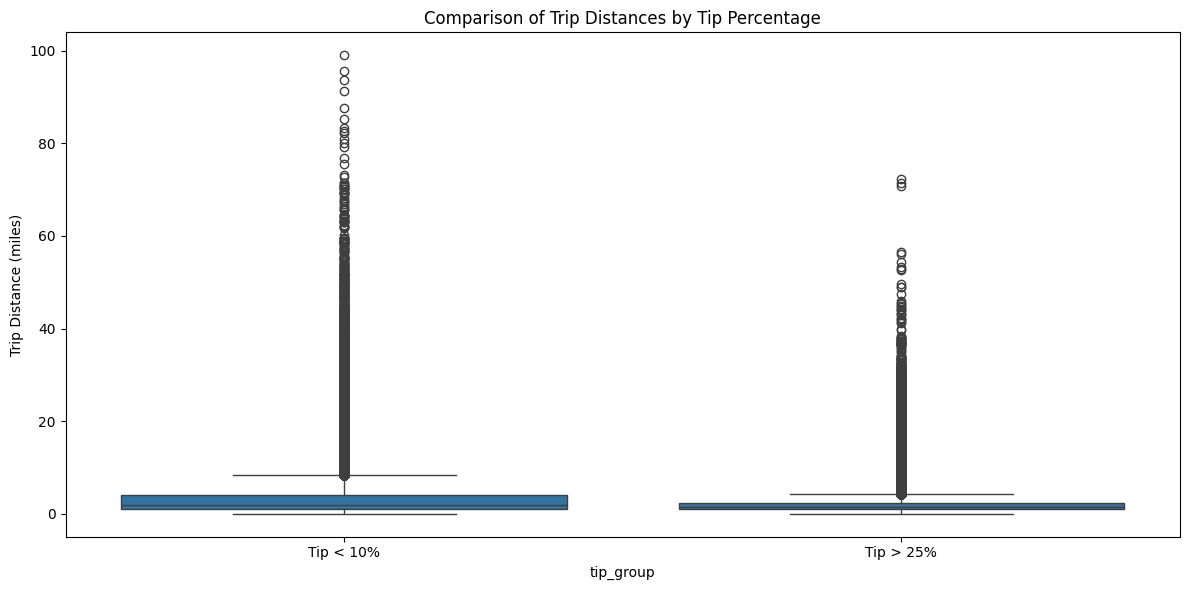

In [109]:
# Combine the two groups into one DataFrame for comparison
df_tips_low['tip_group'] = 'Tip < 10%'
df_tips_high['tip_group'] = 'Tip > 25%'

# Concatenate both DataFrames into one
df_comparison = pd.concat([df_tips_low, df_tips_high])

# Plot fare amount comparison by tip percentage group
plt.figure(figsize=(12, 6))
sns.boxplot(x='tip_group', y='fare_amount', data=df_comparison)
plt.title('Comparison of Fare Amounts by Tip Percentage')
plt.ylabel('Fare Amount ($)')
plt.tight_layout()
plt.show()

# Plot tip amount comparison by tip percentage group
plt.figure(figsize=(12, 6))
sns.boxplot(x='tip_group', y='tip_amount', data=df_comparison)
plt.title('Comparison of Tip Amounts by Tip Percentage')
plt.ylabel('Tip Amount ($)')
plt.tight_layout()
plt.show()

# Plot trip distance comparison by tip percentage group
plt.figure(figsize=(12, 6))
sns.boxplot(x='tip_group', y='trip_distance', data=df_comparison)
plt.title('Comparison of Trip Distances by Tip Percentage')
plt.ylabel('Trip Distance (miles)')
plt.tight_layout()
plt.show()


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

Average Passenger Count by Hour of Day:
hour
0     1.43
1     1.43
2     1.45
3     1.45
4     1.40
5     1.30
6     1.26
7     1.28
8     1.29
9     1.32
10    1.36
11    1.37
12    1.38
13    1.39
14    1.39
15    1.41
16    1.41
17    1.39
18    1.38
19    1.39
20    1.40
21    1.43
22    1.43
23    1.42
Name: passenger_count, dtype: float64


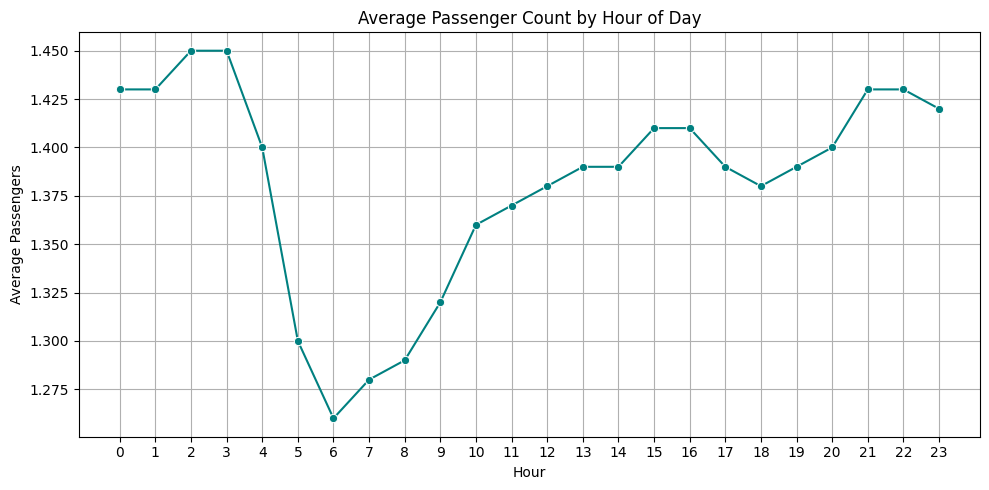

In [110]:
# See how passenger count varies across hours and days
passenger_by_hour = df.groupby('hour')['passenger_count'].mean().round(2)
print("Average Passenger Count by Hour of Day:")
print(passenger_by_hour)
# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=passenger_by_hour.index, y=passenger_by_hour.values, marker='o', color='teal')
plt.title("Average Passenger Count by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Average Passengers")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()



**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

Top 10 Zones by Average Passenger Count:
pickup_zone
Arrochar/Fort Wadsworth             1.95
Red Hook                            1.84
Battery Park                        1.74
Country Club                        1.67
Saint Michaels Cemetery/Woodside    1.67
Ocean Parkway South                 1.62
DUMBO/Vinegar Hill                  1.59
Brooklyn Navy Yard                  1.57
Randalls Island                     1.55
World Trade Center                  1.54
Name: passenger_count, dtype: float64


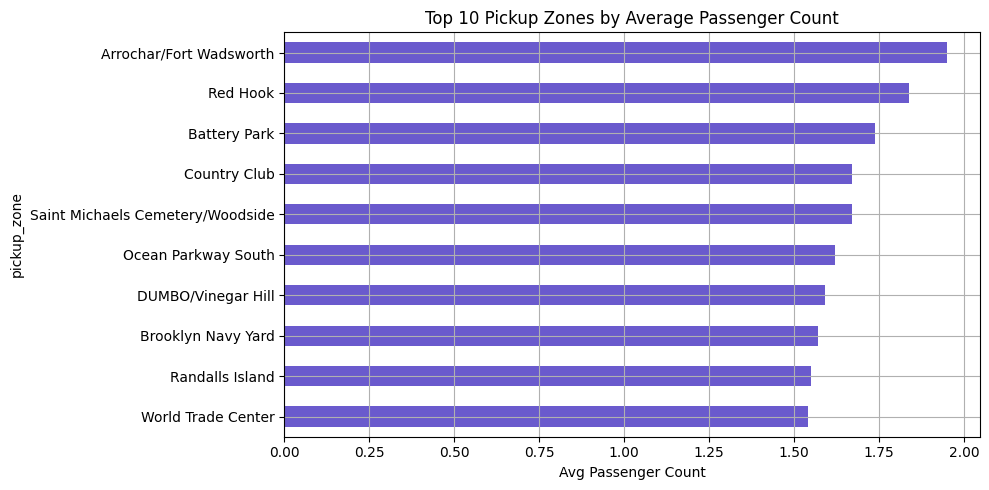

In [111]:
# How does passenger count vary across zones
passenger_by_zone = df_zones.groupby('pickup_zone')['passenger_count'].mean().sort_values(ascending=False).round(2)

print("Top 10 Zones by Average Passenger Count:")
print(passenger_by_zone.head(10))

passenger_by_zone.head(10).plot(kind='barh', figsize=(10, 5), color='slateblue')
plt.title("Top 10 Pickup Zones by Average Passenger Count")
plt.xlabel("Avg Passenger Count")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 1500x1000 with 0 Axes>

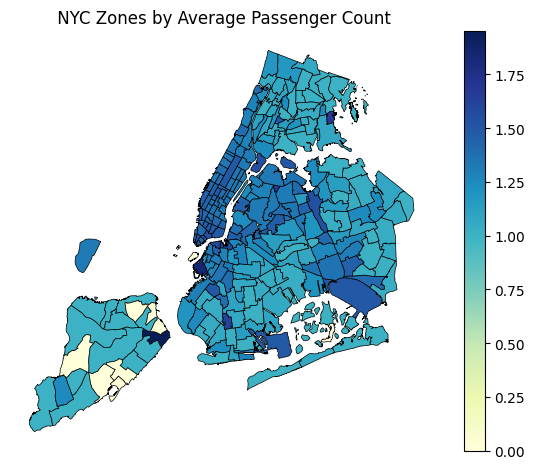

In [112]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
avg_passenger_by_zone = df.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passenger_by_zone['avg_passenger_count'] = avg_passenger_by_zone['passenger_count'].round(2)
avg_passenger_by_zone.drop(columns='passenger_count', inplace=True)

zones_with_trips = zones_with_trips.merge(avg_passenger_by_zone, on='PULocationID', how='left')

zones_with_trips['avg_passenger_count'] = zones_with_trips['avg_passenger_count'].fillna(0)

zones_with_trips[['zone', 'borough', 'trip_count', 'avg_passenger_count']].sort_values(by='avg_passenger_count', ascending=False).head(10)
plt.figure(figsize=(15, 10))
zones_with_trips.plot(
    column='avg_passenger_count',
    cmap='YlGnBu',
    legend=True,
    edgecolor='black',
    linewidth=0.5
)

plt.title(" NYC Zones by Average Passenger Count")
plt.axis('off')
plt.tight_layout()
plt.show()


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

 extra: applied in 1,126,880 trips (62.32%)
 mta_tax: applied in 1,796,750 trips (99.37%)
 improvement_surcharge: applied in 1,808,085 trips (100.00%)
 congestion_surcharge: applied in 1,680,264 trips (92.93%)
 airport_fee: applied in 158,791 trips (8.78%)


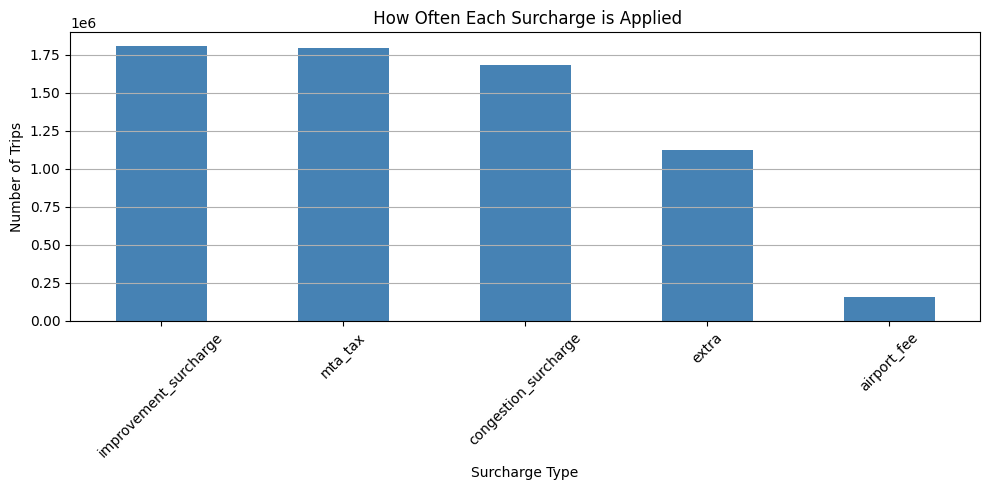

In [113]:
# How often is each surcharge applied?

surcharge_cols = ['extra', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge', 'airport_fee']

for col in surcharge_cols:
    count_applied = (df[col] > 0).sum()
    percentage = (count_applied / len(df)) * 100
    print(f" {col}: applied in {count_applied:,} trips ({percentage:.2f}%)")
    surcharge_counts = {col: (df[col] > 0).sum() for col in surcharge_cols}

surcharge_df = pd.DataFrame.from_dict(surcharge_counts, orient='index', columns=['count'])
surcharge_df['percentage'] = (surcharge_df['count'] / len(df)) * 100
surcharge_df = surcharge_df.sort_values(by='count', ascending=False)
plt.figure(figsize=(10, 5))
surcharge_df['count'].plot(kind='bar', color='steelblue')

plt.title(" How Often Each Surcharge is Applied")
plt.xlabel("Surcharge Type")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.